In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
from coffea import util
from coffea.processor import accumulate
import os
import re
import pandas as pd
import hist
import matplotlib as mpl
import mplhep
import sys

sys.path.append("../../analysisTools/")
import plotTools as ptools
import utils

## Import coffea files -- signal and background

In [2]:
prefix = './coffea/skimmed/'

#suffix = 'BDT_v1_goodVtx_v10'
suffix = 'BDT_v4_goodVtx_v10_Tight_bjetMed'

In [3]:
# Signal
sig_histo = util.load(f'{prefix}/signal_{suffix}.coffea')[0]

In [4]:
# Background
bkg_histo = util.load(f'{prefix}/bkg_{suffix}.coffea')[0]

## Signal

In [5]:
sig_samples = list(sig_histo['cutflow'].keys())
si = pd.DataFrame.from_dict({s:ptools.signalPoint(s) for s in sig_samples}, orient='index')

In [6]:
cutnames = utils.get_signal_list_of_cuts(sig_histo)
cutnames

['Preselections',
 'n(good vertex) > 0',
 'Leading jet pT > 80 GeV',
 'Leading jet |eta| < 2.4',
 'dPhi(MET,leading jet) > 2.0',
 'dPhi(MET,all jets) > 0.75',
 'BDT']

In [7]:
# Efficiency
pd.options.display.float_format = '{:,.6f}'.format
eff_cutflow = utils.get_signal_cutflow_dict(sig_histo, 'cutflow')

In [8]:
table = eff_cutflow
table.columns = cutnames

In [9]:
# Per ctau
for ct in [1, 10, 100]:
    points = (si["ctau"] == ct)
    
    df = table.loc[list(si[points].name)]

    outdir = './csv/Cutflow/Efficiency/'
    outname = f'SR_Signal_ctau-{int(ct)}_samples_Efficiency'
    
    df_to_save = df
    
    utils.save_df_to_csv(df_to_save, outdir, outname, isSignal=True)

Saved: ./csv/Cutflow/Efficiency//SR_Signal_ctau-1_samples_Efficiency.csv
Saved: ./csv/Cutflow/Efficiency//SR_Signal_ctau-10_samples_Efficiency.csv
Saved: ./csv/Cutflow/Efficiency//SR_Signal_ctau-100_samples_Efficiency.csv


In [10]:
# Weighted event count
pd.options.display.float_format = '{:,.4f}'.format
cts_cutflow = utils.get_signal_cutflow_dict(sig_histo, 'cutflow_cts')

In [11]:
table = cts_cutflow
table.columns = cutnames

In [12]:
# ctau = 1mm
ct = 1.0

points = (si["ctau"] == ct)

df = table.loc[list(si[points].name)]
df

Preselections  n(good vertex) > 0  \
sig_2018_Mchi-99p0_dMchi-18p0_ctau-1         44.1691             27.0355   
sig_2018_Mchi-94p5_dMchi-9p0_ctau-1       1,156.9315            653.3357   
sig_2018_Mchi-84p0_dMchi-8p0_ctau-1       1,457.7156            809.7825   
sig_2018_Mchi-77p0_dMchi-14p0_ctau-1         74.7132             45.1167   
sig_2018_Mchi-73p5_dMchi-7p0_ctau-1       1,964.2733          1,075.5539   
sig_2018_Mchi-63p0_dMchi-6p0_ctau-1       2,725.2304          1,439.8035   
sig_2018_Mchi-5p5_dMchi-1p0_ctau-1        1,620.1785            694.2471   
sig_2018_Mchi-5p25_dMchi-0p5_ctau-1      33,765.0692         11,067.0622   
sig_2018_Mchi-55p0_dMchi-10p0_ctau-1        167.4818            104.9556   
sig_2018_Mchi-52p5_dMchi-5p0_ctau-1       4,184.6540          2,184.5614   
sig_2018_Mchi-44p0_dMchi-8p0_ctau-1         403.5456            240.4910   
sig_2018_Mchi-42p0_dMchi-4p0_ctau-1       9,916.8019          5,240.2710   
sig_2018_Mchi-33p0_dMchi-6p0_ctau-1      38,528.4000         22,462.4677   
sig_2018_Mchi-31p5_dMchi-3p0_ctau-1      20,174.8511         10,154.7449   
sig_2018_Mchi-22p0_dMchi-4p0_ctau-1         734.2812            410.3462   
sig_2018_Mchi-21p0_dMchi-2p0_ctau-1      17,929.3616          8,605.9181   
sig_2018_Mchi-11p0_dMchi-2p0_ctau-1         937.0399            487.6645   
sig_2018_Mchi-110p0_dMchi-20p0_ctau-1        34.0246             20.9366   
sig_2018_Mchi-10p5_dMchi-1p0_ctau-1      22,229.4245          9,521.0071   
sig_2018_Mchi-105p0_dMchi-10p0_ctau-1       928.4857            531.4454   

                                       Leading jet pT > 80 GeV  \
sig_2018_Mchi-99p0_dMchi-18p0_ctau-1                   27.0075   
sig_2018_Mchi-94p5_dMchi-9p0_ctau-1                   652.7328   
sig_2018_Mchi-84p0_dMchi-8p0_ctau-1                   808.7173   
sig_2018_Mchi-77p0_dMchi-14p0_ctau-1                   45.0980   
sig_2018_Mchi-73p5_dMchi-7p0_ctau-1                 1,074.8345   
sig_2018_Mchi-63p0_dMchi-6p0_ctau-1                 1,439.5052   
sig_2018_Mchi-5p5_dMchi-1p0_ctau-1                    694.2471   
sig_2018_Mchi-5p25_dMchi-0p5_ctau-1                11,067.0622   
sig_2018_Mchi-55p0_dMchi-10p0_ctau-1                  104.9556   
sig_2018_Mchi-52p5_dMchi-5p0_ctau-1                 2,181.2281   
sig_2018_Mchi-44p0_dMchi-8p0_ctau-1                   240.1318   
sig_2018_Mchi-42p0_dMchi-4p0_ctau-1                 5,236.3207   
sig_2018_Mchi-33p0_dMchi-6p0_ctau-1                22,439.7937   
sig_2018_Mchi-31p5_dMchi-3p0_ctau-1                10,141.8573   
sig_2018_Mchi-22p0_dMchi-4p0_ctau-1                   410.2110   
sig_2018_Mchi-21p0_dMchi-2p0_ctau-1                 8,586.7081   
sig_2018_Mchi-11p0_dMchi-2p0_ctau-1                   487.4558   
sig_2018_Mchi-110p0_dMchi-20p0_ctau-1                  20.9097   
sig_2018_Mchi-10p5_dMchi-1p0_ctau-1                 9,506.9155   
sig_2018_Mchi-105p0_dMchi-10p0_ctau-1                 530.3891   

                                       Leading jet |eta| < 2.4  \
sig_2018_Mchi-99p0_dMchi-18p0_ctau-1                   26.1035   
sig_2018_Mchi-94p5_dMchi-9p0_ctau-1                   629.9795   
sig_2018_Mchi-84p0_dMchi-8p0_ctau-1                   781.4083   
sig_2018_Mchi-77p0_dMchi-14p0_ctau-1                   43.4259   
sig_2018_Mchi-73p5_dMchi-7p0_ctau-1                 1,038.6163   
sig_2018_Mchi-63p0_dMchi-6p0_ctau-1                 1,388.8040   
sig_2018_Mchi-5p5_dMchi-1p0_ctau-1                    667.6527   
sig_2018_Mchi-5p25_dMchi-0p5_ctau-1                10,625.1949   
sig_2018_Mchi-55p0_dMchi-10p0_ctau-1                  100.8183   
sig_2018_Mchi-52p5_dMchi-5p0_ctau-1                 2,110.3235   
sig_2018_Mchi-44p0_dMchi-8p0_ctau-1                   232.2328   
sig_2018_Mchi-42p0_dMchi-4p0_ctau-1                 5,044.4138   
sig_2018_Mchi-33p0_dMchi-6p0_ctau-1                21,647.3346   
sig_2018_Mchi-31p5_dMchi-3p0_ctau-1                 9,868.1038   
sig_2018_Mchi-22p0_dMchi-4p0_ctau-1                   394.0044   

In [13]:
# Per ctau
for ct in [1, 10, 100]:
    points = (si["ctau"] == ct)
    
    df = table.loc[list(si[points].name)]

    outdir = './csv/Cutflow/Efficiency/'
    outname = f'SR_Signal_ctau-{int(ct)}_samples_EventCount_Weighted'
    
    df_to_save = df
    
    utils.save_df_to_csv(df_to_save, outdir, outname, isSignal=True)

Saved: ./csv/Cutflow/Efficiency//SR_Signal_ctau-1_samples_EventCount_Weighted.csv
Saved: ./csv/Cutflow/Efficiency//SR_Signal_ctau-10_samples_EventCount_Weighted.csv
Saved: ./csv/Cutflow/Efficiency//SR_Signal_ctau-100_samples_EventCount_Weighted.csv


In [19]:
# Raw count
pd.options.display.float_format = '{:,.4f}'.format
raw_cutflow = utils.get_signal_cutflow_dict(sig_histo, 'cutflow_nevts')

In [20]:
# Raw count
pd.options.display.float_format = '{:,.4f}'.format
raw_cutflow = utils.get_signal_cutflow_dict(sig_histo, 'cutflow_nevts')

In [ ]:
table = raw_cutflow
table.columns = cutnames

In [16]:
# Per ctau
for ct in [1, 10, 100]:
    points = (si["ctau"] == ct)
    
    df = table.loc[list(si[points].name)]

    outdir = './csv/Cutflow/Efficiency/'
    outname = f'SR_Signal_ctau-{int(ct)}_samples_Raw'
    
    df_to_save = df
    
    utils.save_df_to_csv(df_to_save, outdir, outname, isSignal=True)

Saved: ./csv/Cutflow/Efficiency//SR_Signal_ctau-1_samples_Raw.csv
Saved: ./csv/Cutflow/Efficiency//SR_Signal_ctau-10_samples_Raw.csv
Saved: ./csv/Cutflow/Efficiency//SR_Signal_ctau-100_samples_Raw.csv


['Preselections', 'n(good vertex) > 0 && N(Jets) > 2', 'Leading jet pT > 80 GeV', 'Leading jet |eta| < 2.4', 'dPhi(MET,leading jet) > 2.0', 'dPhi(MET,all jets) > 0.75', 'BDT']
Saved: ./plots/cutflow//Cutflow_SR_signal_delta_0p1_ct_1_m5to40.png


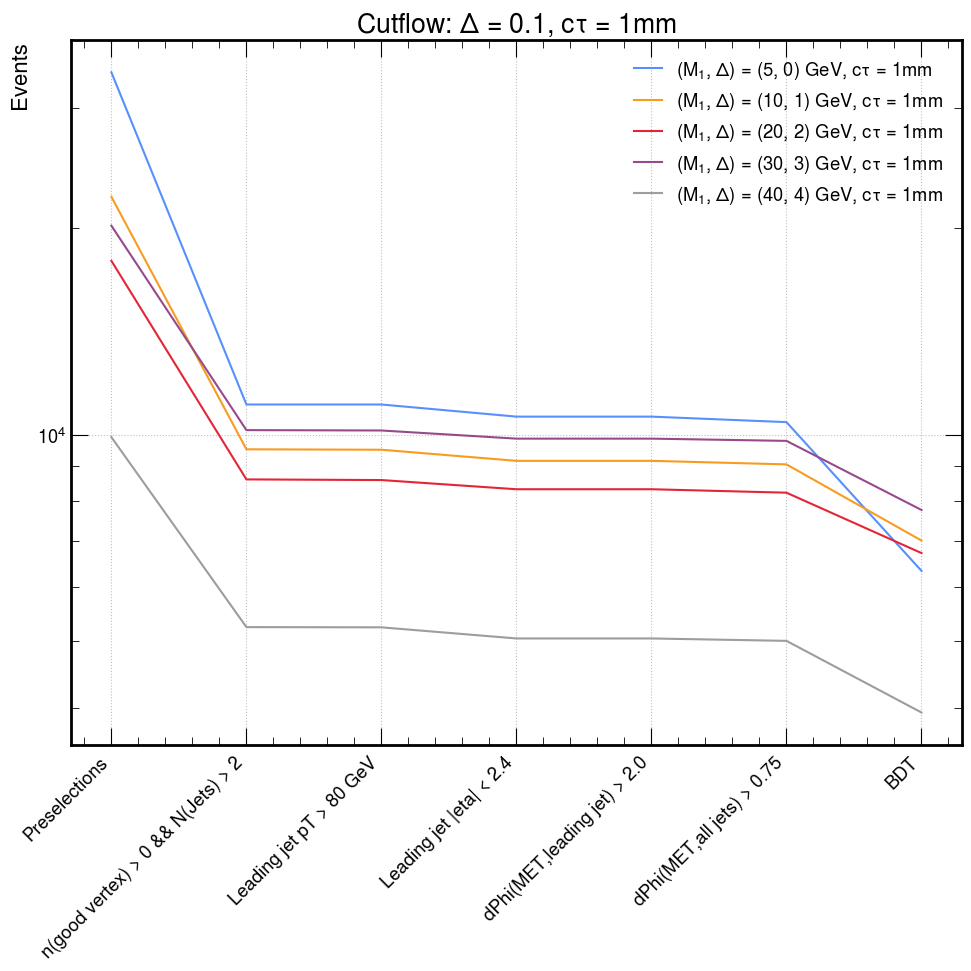

['Preselections', 'n(good vertex) > 0 && N(Jets) > 2', 'Leading jet pT > 80 GeV', 'Leading jet |eta| < 2.4', 'dPhi(MET,leading jet) > 2.0', 'dPhi(MET,all jets) > 0.75', 'BDT']
Saved: ./plots/cutflow//Cutflow_SR_signal_delta_0p1_ct_10_m5to40.png


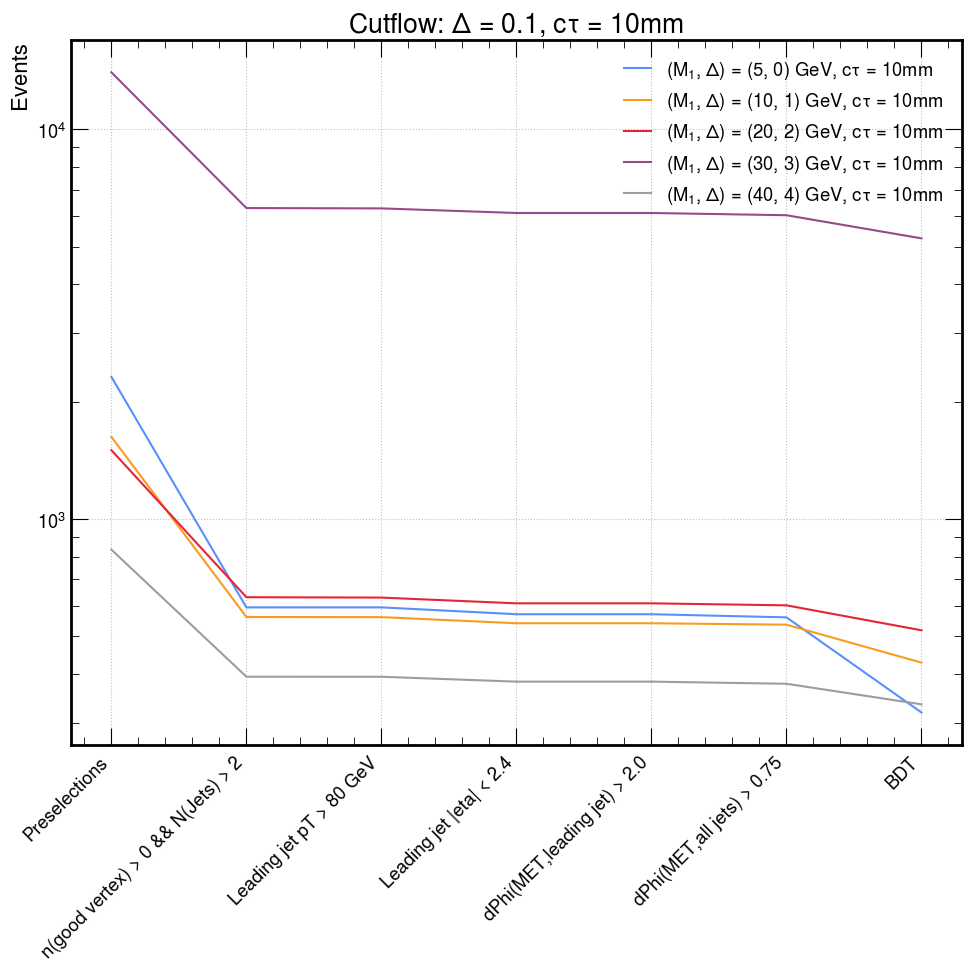

['Preselections', 'n(good vertex) > 0 && N(Jets) > 2', 'Leading jet pT > 80 GeV', 'Leading jet |eta| < 2.4', 'dPhi(MET,leading jet) > 2.0', 'dPhi(MET,all jets) > 0.75', 'BDT']
Saved: ./plots/cutflow//Cutflow_SR_signal_delta_0p1_ct_100_m5to40.png


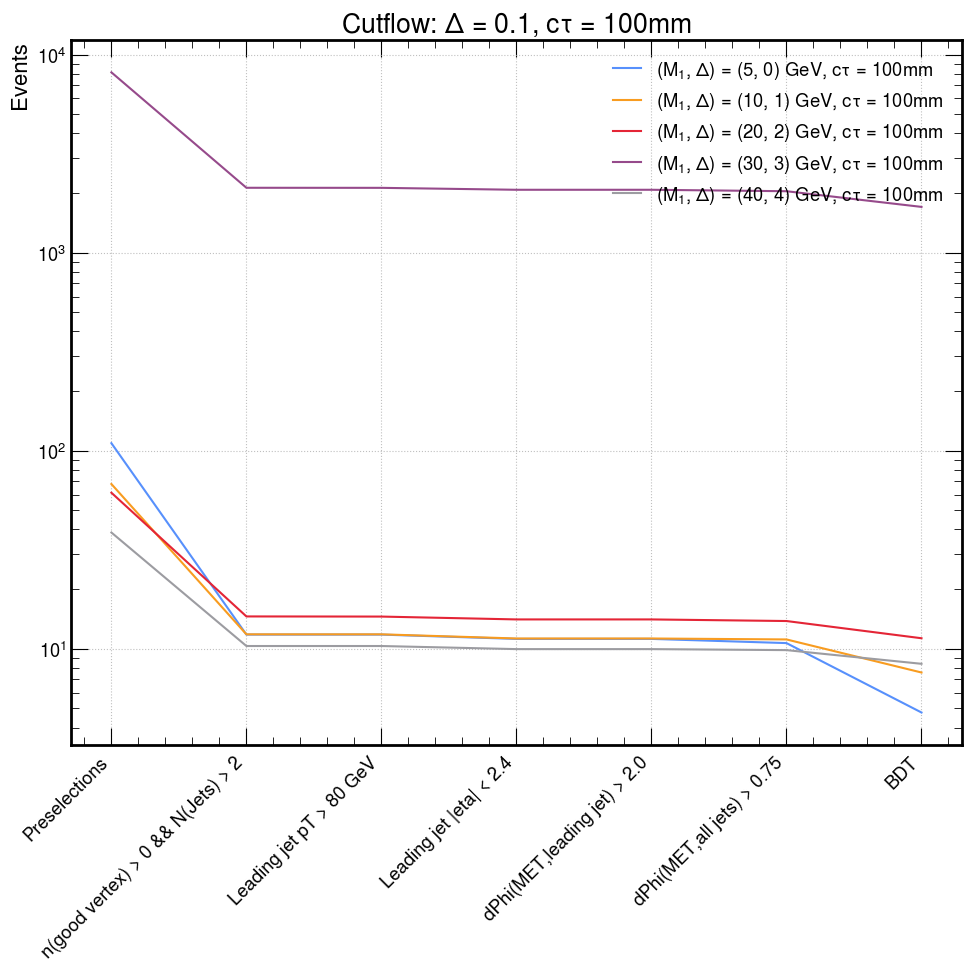

['Preselections', 'n(good vertex) > 0 && N(Jets) > 2', 'Leading jet pT > 80 GeV', 'Leading jet |eta| < 2.4', 'dPhi(MET,leading jet) > 2.0', 'dPhi(MET,all jets) > 0.75', 'BDT']
Saved: ./plots/cutflow//Cutflow_SR_signal_delta_0p2_ct_1_m5to40.png


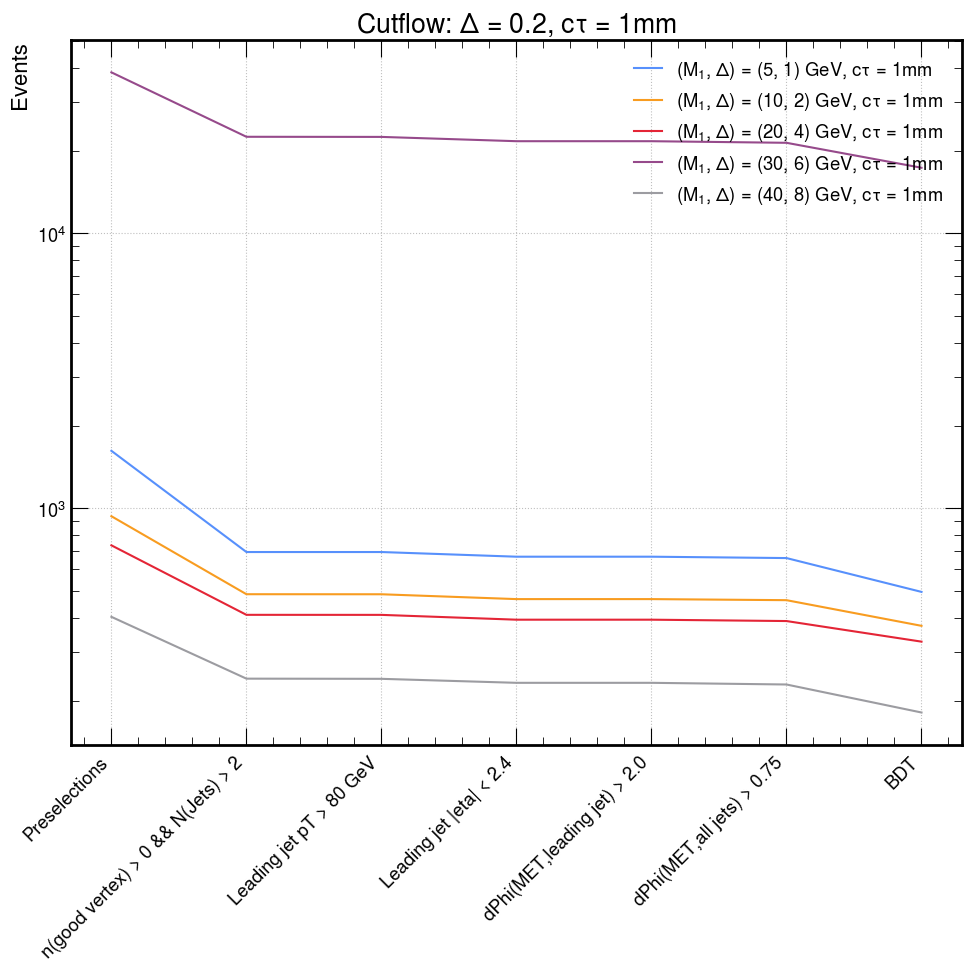

['Preselections', 'n(good vertex) > 0 && N(Jets) > 2', 'Leading jet pT > 80 GeV', 'Leading jet |eta| < 2.4', 'dPhi(MET,leading jet) > 2.0', 'dPhi(MET,all jets) > 0.75', 'BDT']
Saved: ./plots/cutflow//Cutflow_SR_signal_delta_0p2_ct_10_m5to40.png


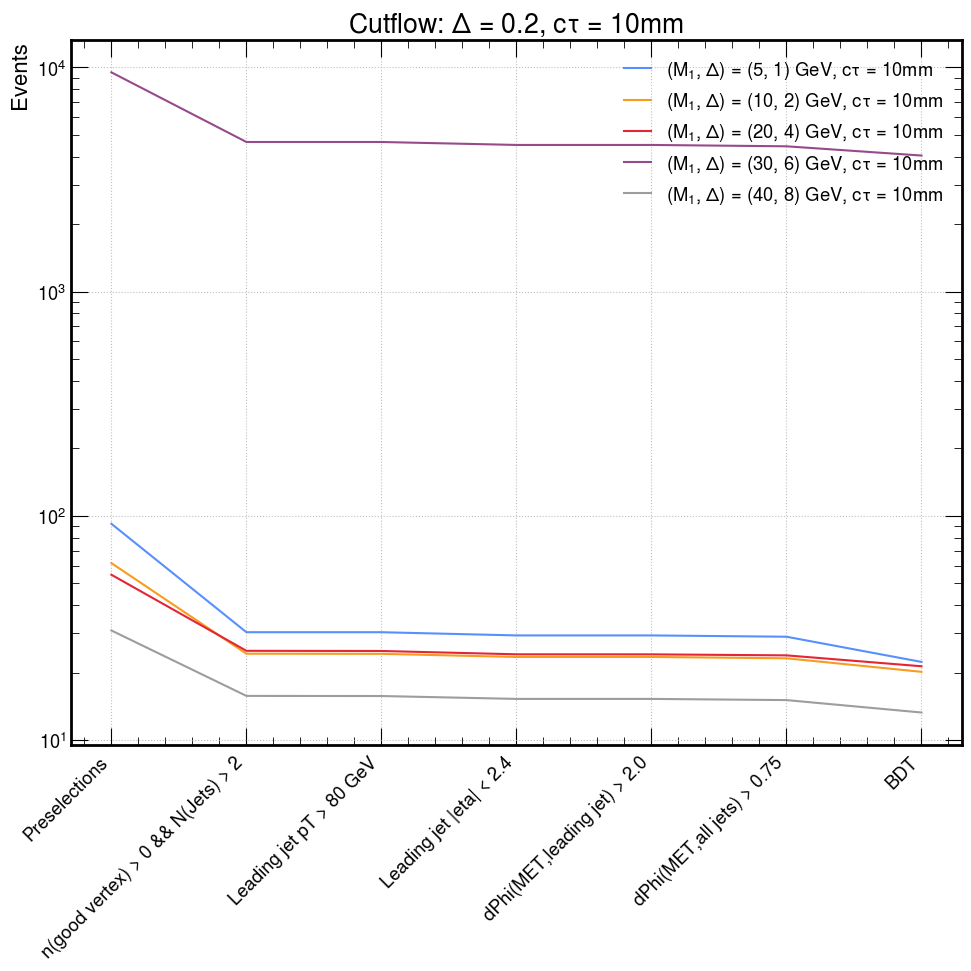

['Preselections', 'n(good vertex) > 0 && N(Jets) > 2', 'Leading jet pT > 80 GeV', 'Leading jet |eta| < 2.4', 'dPhi(MET,leading jet) > 2.0', 'dPhi(MET,all jets) > 0.75', 'BDT']
Saved: ./plots/cutflow//Cutflow_SR_signal_delta_0p2_ct_100_m5to40.png


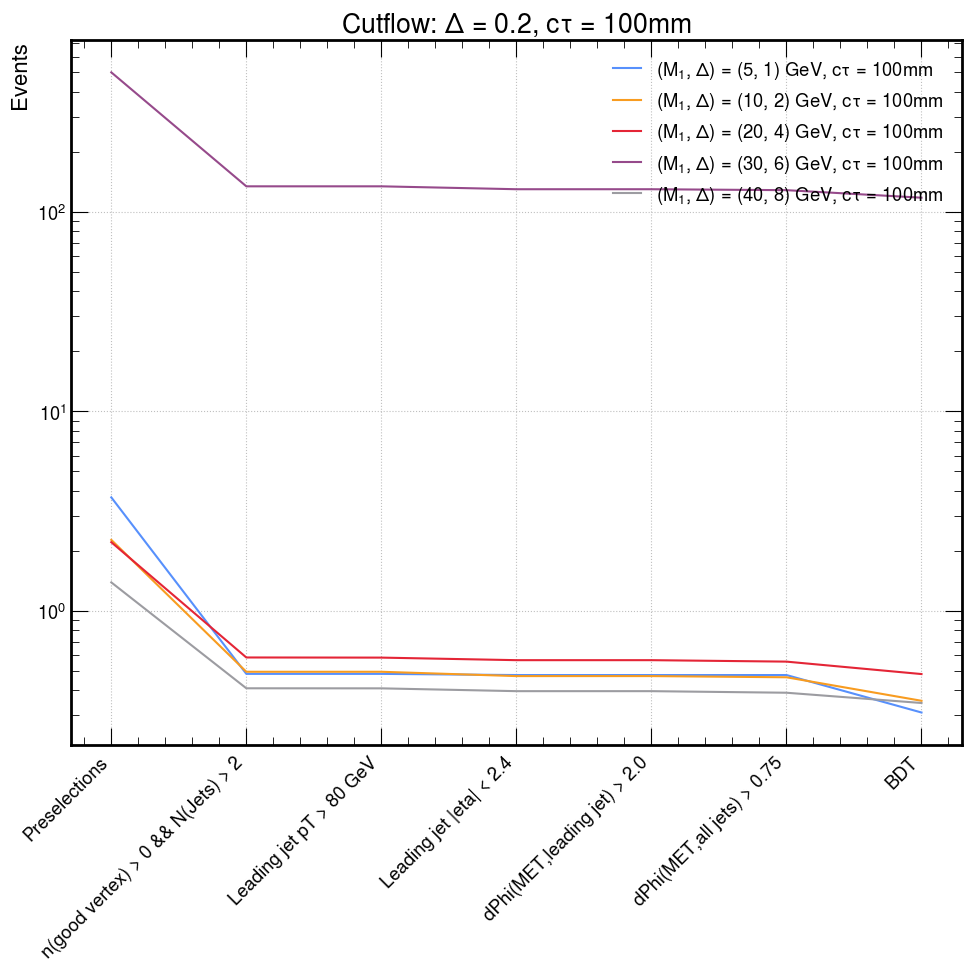

In [17]:
df = utils.get_signal_cutflow_dict(sig_histo, 'cutflow_cts')

fig, axes = plt.subplots()

plot_dict_sig_eff = {
    # Select signal points to display
    'm1s': [5, 10, 20, 30, 40],
    'deltas': [0.1],
    'ctaus': [1],

    # Plot display styling
    'ylim': None, # None for default; otherwise [ymin, ymax]
    'doLog': True,
    
    'ylabel': 'Events', # None for default
    'title': rf"Cutflow", 

    # Plot saving
    'doSave': True,
    'outDir': './plots/cutflow/',
    'outName': ''
}

# Delta 0.1 1mm

for delta in [0.1, 0.2]:
    for ctau in [1, 10, 100]:
        plot_dict_sig_eff['deltas'] = [delta]
        plot_dict_sig_eff['ctaus'] = [ctau]
        
        plot_dict_sig_eff['title'] = rf"Cutflow: $\Delta$ = {delta}, c$\tau$ = {ctau}mm"
        plot_dict_sig_eff['outName'] = rf"Cutflow_SR_signal_delta_{str(delta).replace('.', 'p')}_ct_{ctau}_m5to40.png"
        
        ptools.plot_signal_efficiency(sig_histo, df, plot_dict_sig_eff)

['Preselections', 'n(good vertex) > 0 && N(Jets) > 2', 'Leading jet pT > 80 GeV', 'Leading jet |eta| < 2.4', 'dPhi(MET,leading jet) > 2.0', 'dPhi(MET,all jets) > 0.75', 'BDT']
Saved: ./plots/cutflow//Cutflow_SR_signal_delta_0p1_ct_1_m50to100.png


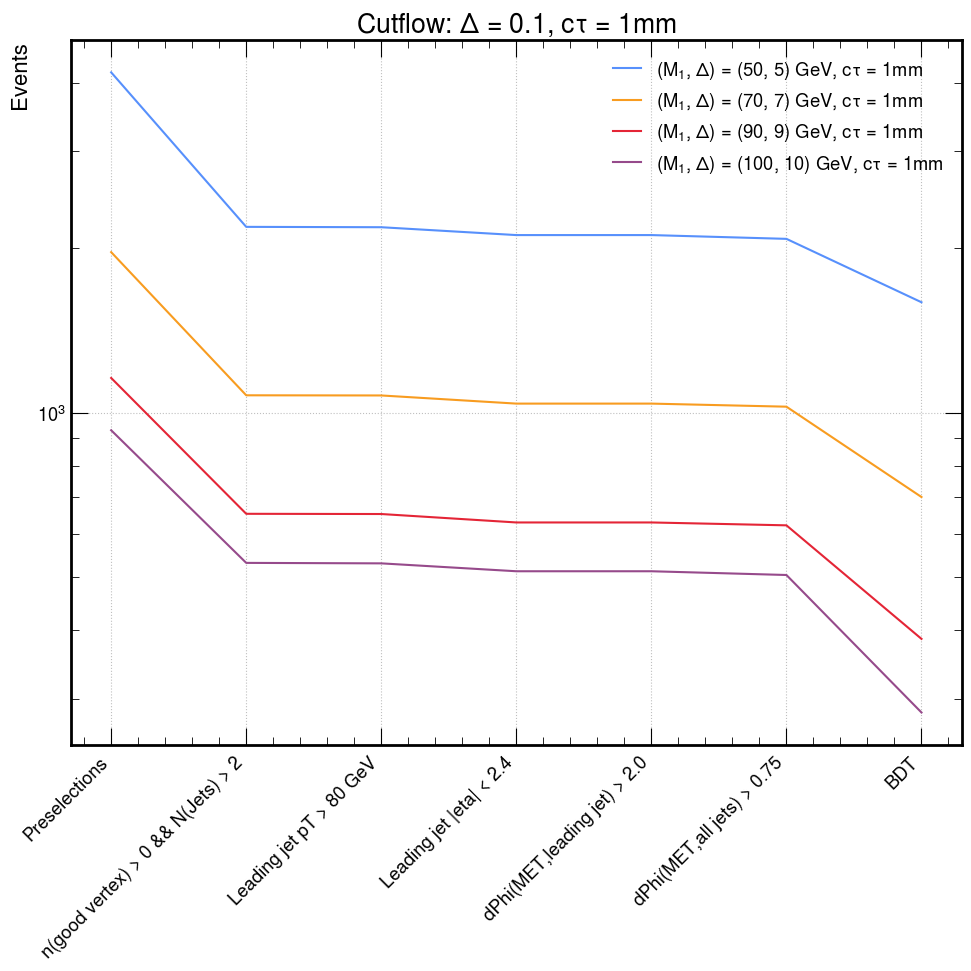

['Preselections', 'n(good vertex) > 0 && N(Jets) > 2', 'Leading jet pT > 80 GeV', 'Leading jet |eta| < 2.4', 'dPhi(MET,leading jet) > 2.0', 'dPhi(MET,all jets) > 0.75', 'BDT']
Saved: ./plots/cutflow//Cutflow_SR_signal_delta_0p1_ct_10_m50to100.png


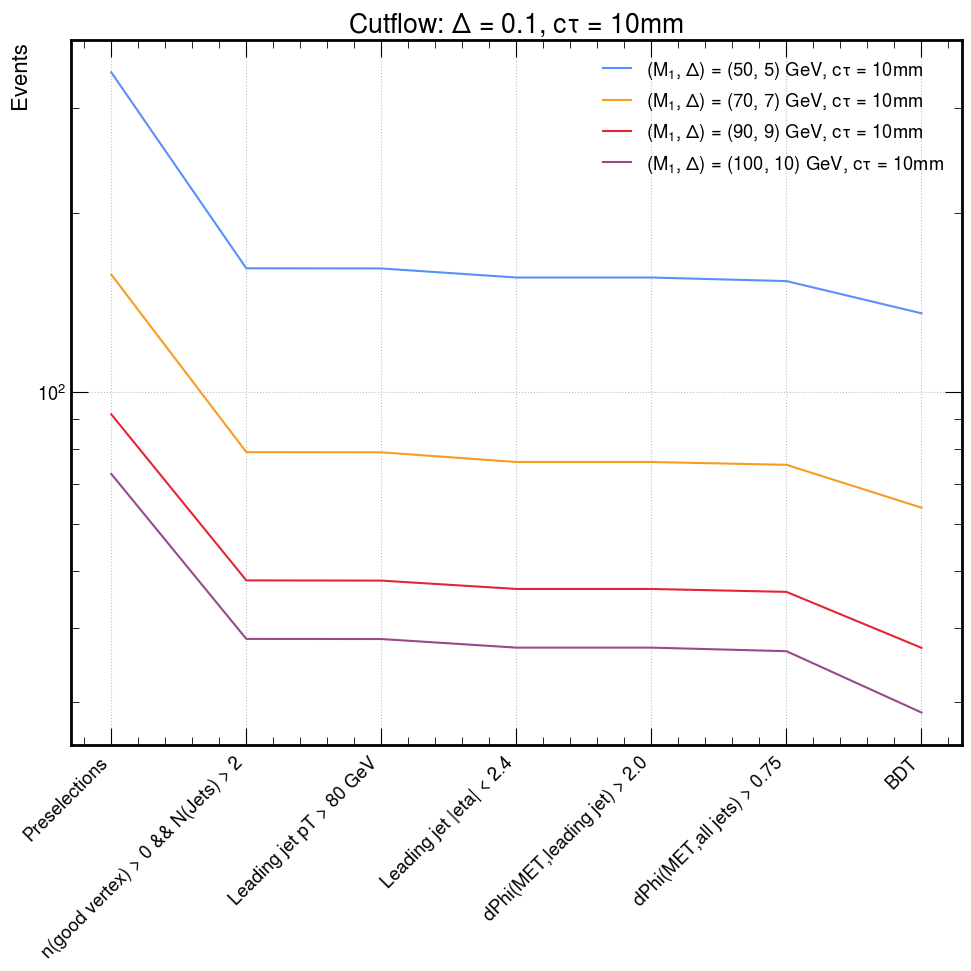

['Preselections', 'n(good vertex) > 0 && N(Jets) > 2', 'Leading jet pT > 80 GeV', 'Leading jet |eta| < 2.4', 'dPhi(MET,leading jet) > 2.0', 'dPhi(MET,all jets) > 0.75', 'BDT']
Saved: ./plots/cutflow//Cutflow_SR_signal_delta_0p1_ct_100_m50to100.png


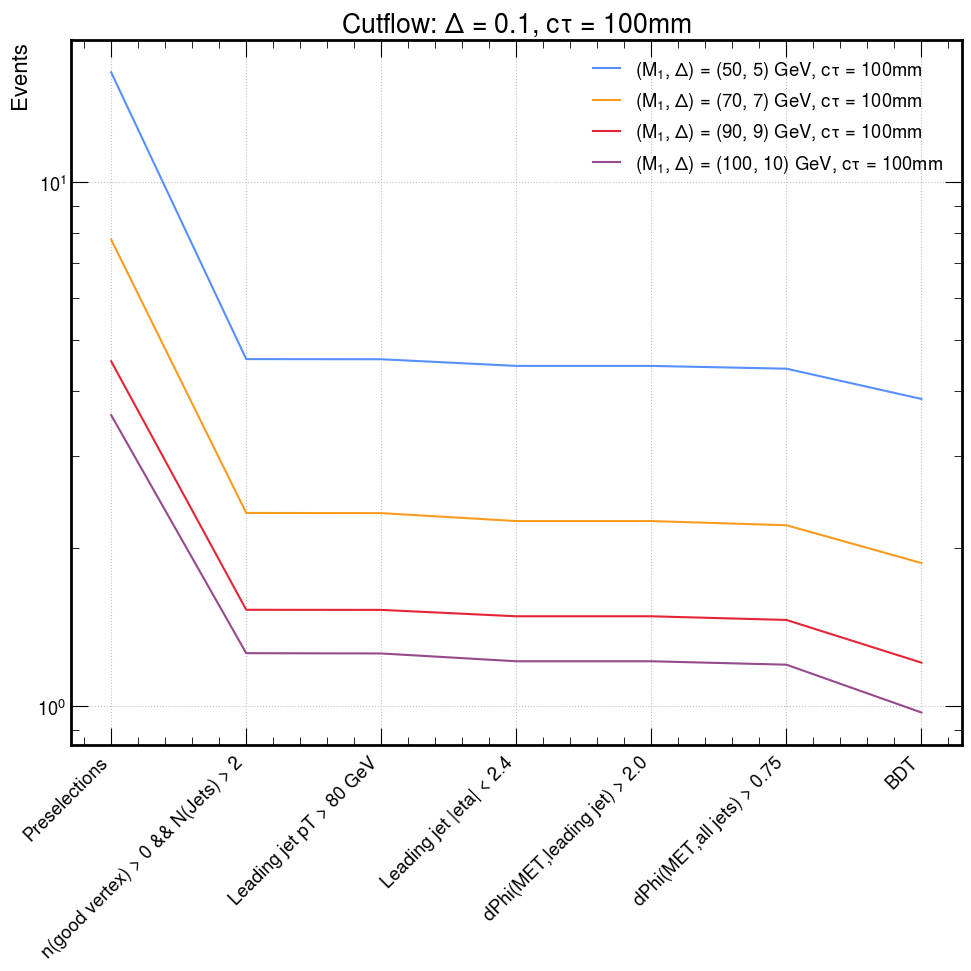

['Preselections', 'n(good vertex) > 0 && N(Jets) > 2', 'Leading jet pT > 80 GeV', 'Leading jet |eta| < 2.4', 'dPhi(MET,leading jet) > 2.0', 'dPhi(MET,all jets) > 0.75', 'BDT']
Saved: ./plots/cutflow//Cutflow_SR_signal_delta_0p2_ct_1_m50to100.png


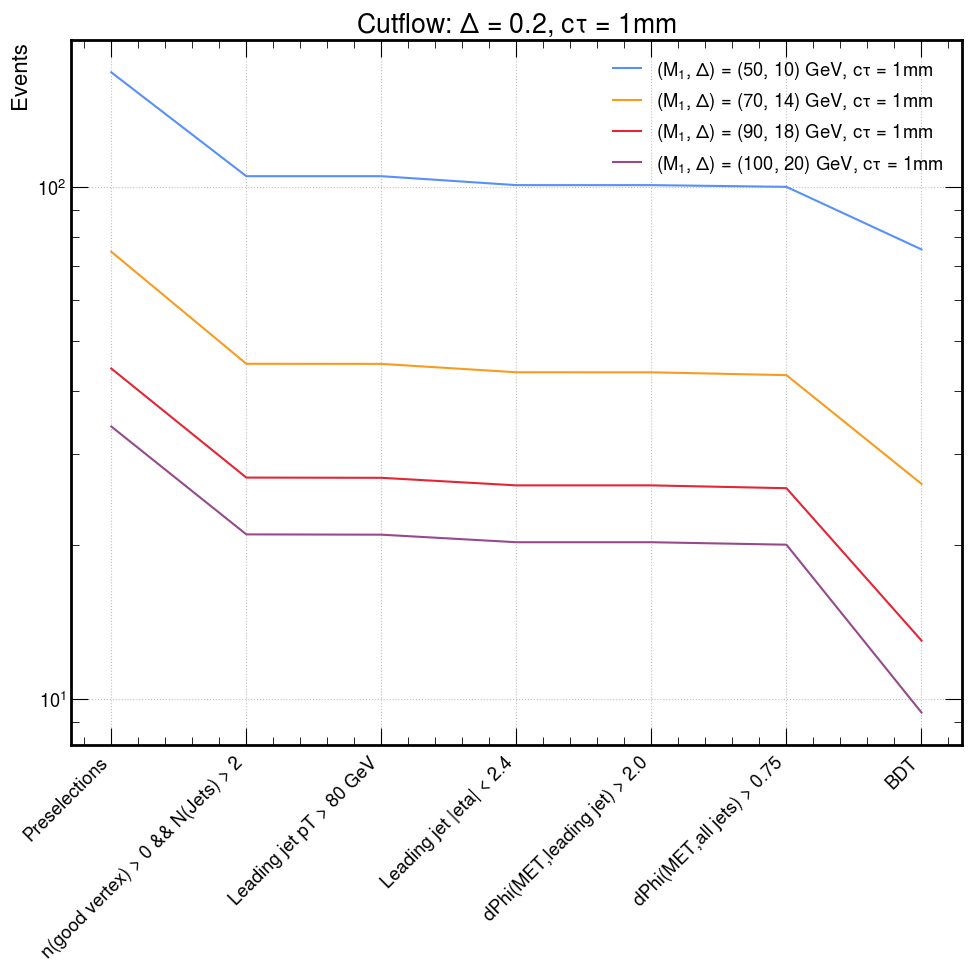

['Preselections', 'n(good vertex) > 0 && N(Jets) > 2', 'Leading jet pT > 80 GeV', 'Leading jet |eta| < 2.4', 'dPhi(MET,leading jet) > 2.0', 'dPhi(MET,all jets) > 0.75', 'BDT']
Saved: ./plots/cutflow//Cutflow_SR_signal_delta_0p2_ct_10_m50to100.png


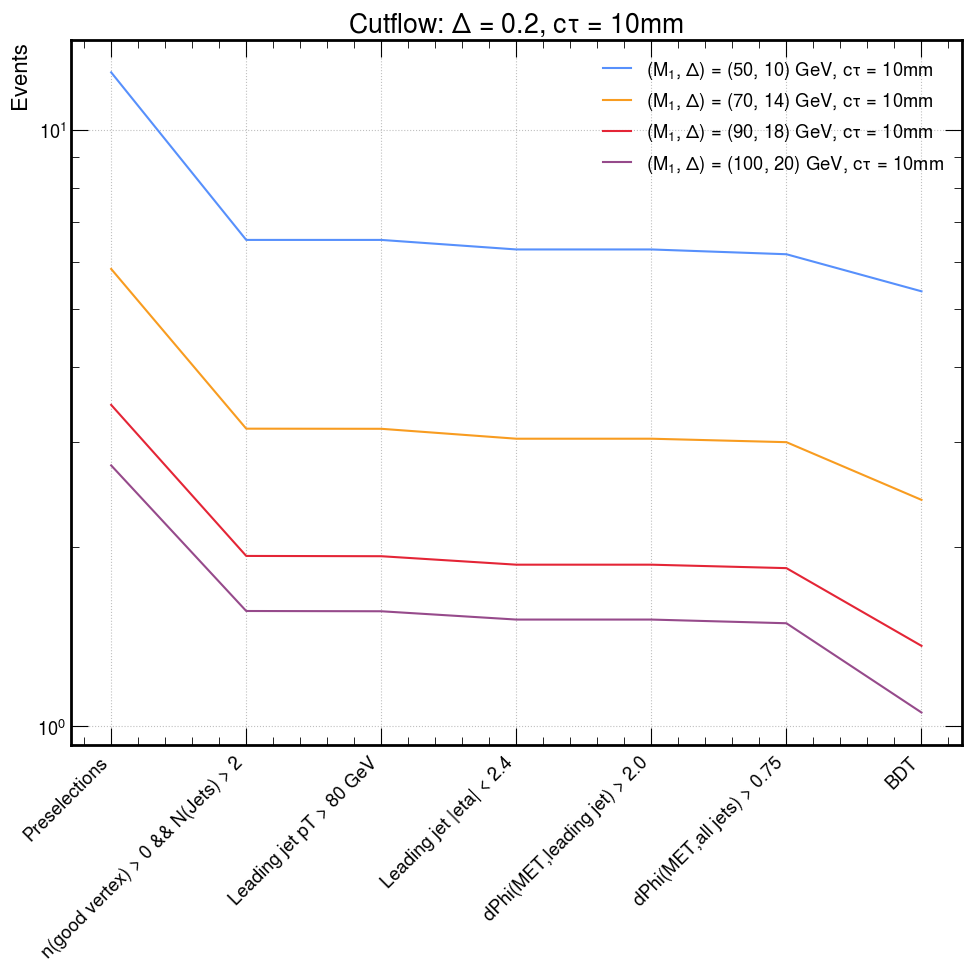

['Preselections', 'n(good vertex) > 0 && N(Jets) > 2', 'Leading jet pT > 80 GeV', 'Leading jet |eta| < 2.4', 'dPhi(MET,leading jet) > 2.0', 'dPhi(MET,all jets) > 0.75', 'BDT']
Saved: ./plots/cutflow//Cutflow_SR_signal_delta_0p2_ct_100_m50to100.png


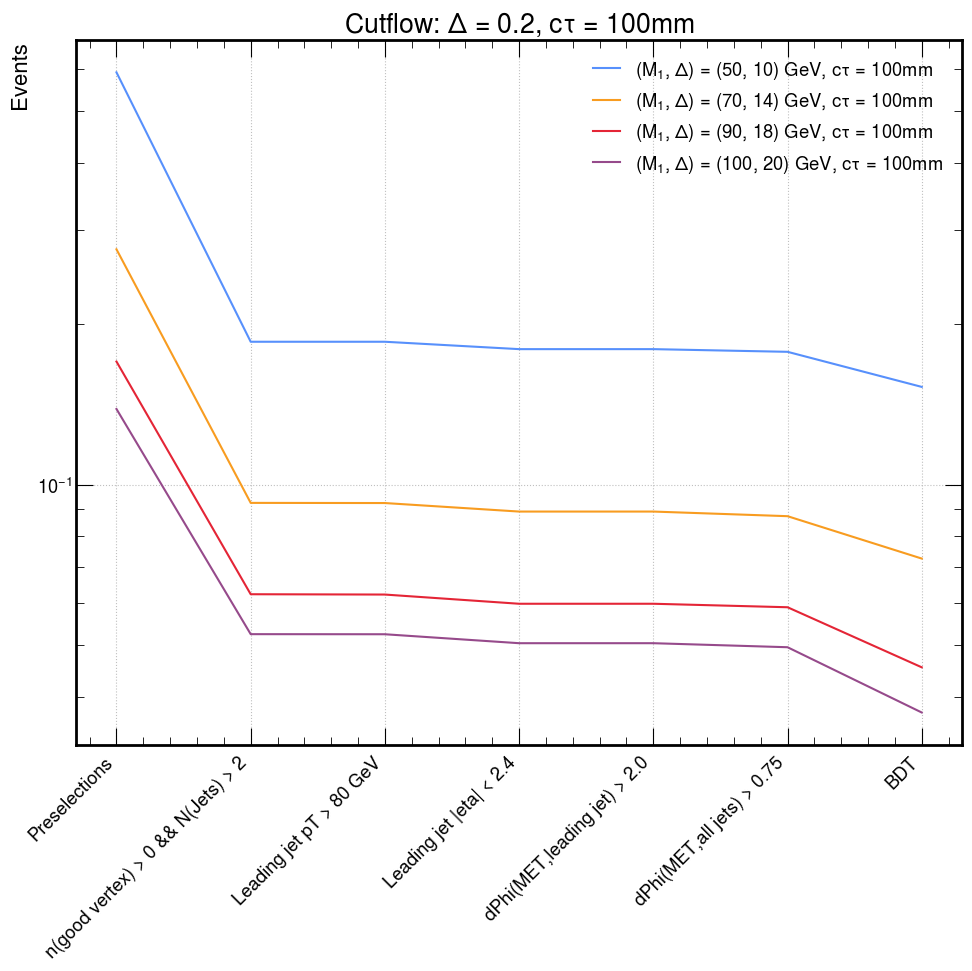

In [18]:
df = utils.get_signal_cutflow_dict(sig_histo, 'cutflow_cts')

fig, axes = plt.subplots()

plot_dict_sig_eff = {
    # Select signal points to display
    'm1s': [50, 70, 90, 100],
    'deltas': [0.1],
    'ctaus': [1],

    # Plot display styling
    'ylim': None, # None for default; otherwise [ymin, ymax]
    'doLog': True,
    
    'ylabel': 'Events', # None for default
    'title': rf"Cutflow", 

    # Plot saving
    'doSave': True,
    'outDir': './plots/cutflow/',
    'outName': ''
}

# Delta 0.1 1mm

for delta in [0.1, 0.2]:
    for ctau in [1, 10, 100]:
        plot_dict_sig_eff['deltas'] = [delta]
        plot_dict_sig_eff['ctaus'] = [ctau]
        
        plot_dict_sig_eff['title'] = rf"Cutflow: $\Delta$ = {delta}, c$\tau$ = {ctau}mm"
        plot_dict_sig_eff['outName'] = rf"Cutflow_SR_signal_delta_{str(delta).replace('.', 'p')}_ct_{ctau}_m50to100.png"
        
        ptools.plot_signal_efficiency(sig_histo, df, plot_dict_sig_eff)

## Background

In [19]:
# efficiency
pd.options.display.float_format = '{:,.8f}'.format

bkg_eff_df = utils.get_bkg_cutflow_df(bkg_histo, 'cutflow')
bkg_eff_df

Preselections  n(good vertex) > 0  Leading jet pT > 80 GeV  \
QCD            0.00000249          0.00000001               0.00000001   
ZGamma         0.00032468          0.00001085               0.00000895   
WJets          0.00101318          0.00001998               0.00001966   
ZJets          0.00242159          0.00004092               0.00004052   
Top            0.00039885          0.00000872               0.00000805   
Multiboson     0.00065832          0.00002550               0.00002174   
DY             0.00018701          0.00000911               0.00000904   
Total          0.00001696          0.00000030               0.00000029   

            Leading jet |eta| < 2.4  dPhi(MET,leading jet) > 2.0  \
QCD                      0.00000001                   0.00000000   
ZGamma                   0.00000810                   0.00000829   
WJets                    0.00001870                   0.00001859   
ZJets                    0.00003836                   0.00003825   
Top                      0.00000726                   0.00000717   
Multiboson               0.00002000                   0.00001916   
DY                       0.00000876                   0.00000866   
Total                    0.00000028                   0.00000027   

            dPhi(MET,all jets) > 0.75        BDT  
QCD                        0.00000000 0.00000000  
ZGamma                     0.00000865 0.00000016  
WJets                      0.00001712 0.00000014  
ZJets                      0.00003580 0.00000054  
Top                        0.00000654 0.00000006  
Multiboson                 0.00001838 0.00000004  
DY                         0.00000777 0.00000023  
Total                      0.00000025 0.00000000

In [20]:
# Save as csv
outdir = f'./csv/{suffix}/Cutflow/Efficiency/'
outname = f'Background_Efficiency'

df_to_save = bkg_eff_df

utils.save_df_to_csv(df_to_save, outdir, outname)

Saved: ./csv/BDT_v4_goodVtx_v10_Tight_bjetMed/Cutflow/Efficiency//Background_Efficiency.csv


In [30]:
# weighted event count
pd.options.display.float_format = '{:,.2f}'.format
bkg_cts_df = utils.get_bkg_cutflow_df(bkg_histo, 'cutflow_cts', isLegacy = False)

bkg_cts_df.rename(columns={'n(good vertex) > 0': 'n(jet) > 2 && n(good vertex) > 0'})

Preselections  n(jet) > 2 && n(good vertex) > 0  \
QCD             53,432.27                            143.90   
ZGamma           1,665.13                             55.64   
WJets          214,692.24                          4,234.00   
ZJets           63,745.58                          1,077.24   
Top             26,174.93                            572.21   
Multiboson       4,588.16                            177.76   
DY               5,819.49                            283.63   
Total          370,117.80                          6,544.37   

            Leading jet pT > 80 GeV  Leading jet |eta| < 2.4  \
QCD                          143.90                   113.59   
ZGamma                        45.88                    41.53   
WJets                      4,165.69                 3,961.85   
ZJets                      1,066.65                 1,009.84   
Top                          528.44                   476.47   
Multiboson                   151.51                   139.36   
DY                           281.45                   272.51   
Total                      6,383.52                 6,015.15   

            dPhi(MET,leading jet) > 2.0  dPhi(MET,all jets) > 0.75   BDT  
QCD                              104.68                      24.07  0.00  
ZGamma                            42.49                      44.35  0.83  
WJets                          3,939.40                   3,628.71 29.90  
ZJets                          1,006.95                     942.29 14.29  
Top                              470.60                     428.99  3.83  
Multiboson                       133.52                     128.09  0.29  
DY                               269.56                     241.82  7.09  
Total                          5,967.22                   5,438.32 56.23

In [31]:
# Save to csv
outdir = f'./csv/{suffix}/Cutflow/EventCount_Weighted/'
outname = f'Background_EventCount_Weighted'

df_to_save = bkg_cts_df

utils.save_df_to_csv(df_to_save, outdir, outname)

Saved: ./csv/BDT_v4_goodVtx_v10_Tight_bjetMed/Cutflow/EventCount_Weighted//Background_EventCount_Weighted.csv


In [32]:
# raw event count
pd.options.display.float_format = '{:,.0f}'.format
bkg_cts_raw_df = utils.get_bkg_cutflow_df(bkg_histo, 'cutflow_nevts', isLegacy = False)

bkg_cts_raw_df

Preselections  n(good vertex) > 0  Leading jet pT > 80 GeV  \
QCD                 31490                  53                       53   
ZGamma               6506                 231                      205   
WJets             1177020               11371                    11208   
ZJets              738994                6747                     6684   
Top                703976               14988                    13610   
Multiboson          25187                 989                      818   
DY                 296131                5911                     5891   
Total             2979304               40290                    38469   

            Leading jet |eta| < 2.4  dPhi(MET,leading jet) > 2.0  \
QCD                              52                           50   
ZGamma                          195                          185   
WJets                         10799                        10598   
ZJets                          6410                         6335   
Top                           12225                        11930   
Multiboson                      760                          702   
DY                             5806                         5512   
Total                         36247                        35312   

            dPhi(MET,all jets) > 0.75  BDT  
QCD                                 3    0  
ZGamma                            166    1  
WJets                            9030   71  
ZJets                            5430   69  
Top                             10822   76  
Multiboson                        667    1  
DY                               3810   79  
Total                           29928  297

In [33]:
# raw event count
pd.options.display.float_format = '{:,.0f}'.format
bkg_cts_raw_df = utils.get_bkg_cutflow_df(bkg_histo, 'cutflow_nevts', isLegacy = False)

bkg_cts_raw_df.rename(columns={'n(good vertex) > 0': 'n(jet) > 2 && n(good vertex) > 0'})

Preselections  n(jet) > 2 && n(good vertex) > 0  \
QCD                 31490                                53   
ZGamma               6506                               231   
WJets             1177020                             11371   
ZJets              738994                              6747   
Top                703976                             14988   
Multiboson          25187                               989   
DY                 296131                              5911   
Total             2979304                             40290   

            Leading jet pT > 80 GeV  Leading jet |eta| < 2.4  \
QCD                              53                       52   
ZGamma                          205                      195   
WJets                         11208                    10799   
ZJets                          6684                     6410   
Top                           13610                    12225   
Multiboson                      818                      760   
DY                             5891                     5806   
Total                         38469                    36247   

            dPhi(MET,leading jet) > 2.0  dPhi(MET,all jets) > 0.75  BDT  
QCD                                  50                          3    0  
ZGamma                              185                        166    1  
WJets                             10598                       9030   71  
ZJets                              6335                       5430   69  
Top                               11930                      10822   76  
Multiboson                          702                        667    1  
DY                                 5512                       3810   79  
Total                             35312                      29928  297

In [34]:
outdir = f'./csv/{suffix}/Cutflow/EventCount_Raw/'
outname = f'Background_EventCount_Raw'

df_to_save = bkg_cts_raw_df

utils.save_df_to_csv(df_to_save, outdir, outname)

Saved: ./csv/BDT_v4_goodVtx_v10_Tight_bjetMed/Cutflow/EventCount_Raw//Background_EventCount_Raw.csv


In [35]:
nBkg = bkg_cts_df.loc['Total'][-1]

print(f'Total number of backgrounds (weighted) after the last SR cut: {nBkg:.2f}')

Total number of backgrounds (weighted) after the last SR cut: 56.23


In [36]:
pd.options.display.float_format = '{:,.2f}'.format

bkg_composition = pd.concat([pd.DataFrame(bkg_cts_df[bkg_cts_df.columns.values[-1]]).transpose(), pd.DataFrame(bkg_cts_raw_df[bkg_cts_df.columns.values[-1]]).transpose()], ignore_index=True)

bkg_composition = bkg_composition.rename(index={0: 'Weighted Counts', 1: 'Raw Counts'})
bkg_composition

QCD  ZGamma  WJets  ZJets   Top  Multiboson    DY  Total
Weighted Counts 0.00    0.83  29.90  14.29  3.83        0.29  7.09  56.23
Raw Counts      0.00    1.00  71.00  69.00 76.00        1.00 79.00 297.00

Saved: ./plots/BDT_v4_goodVtx_v10_Tight_bjetMed/cutflow//Cutflow_background.png


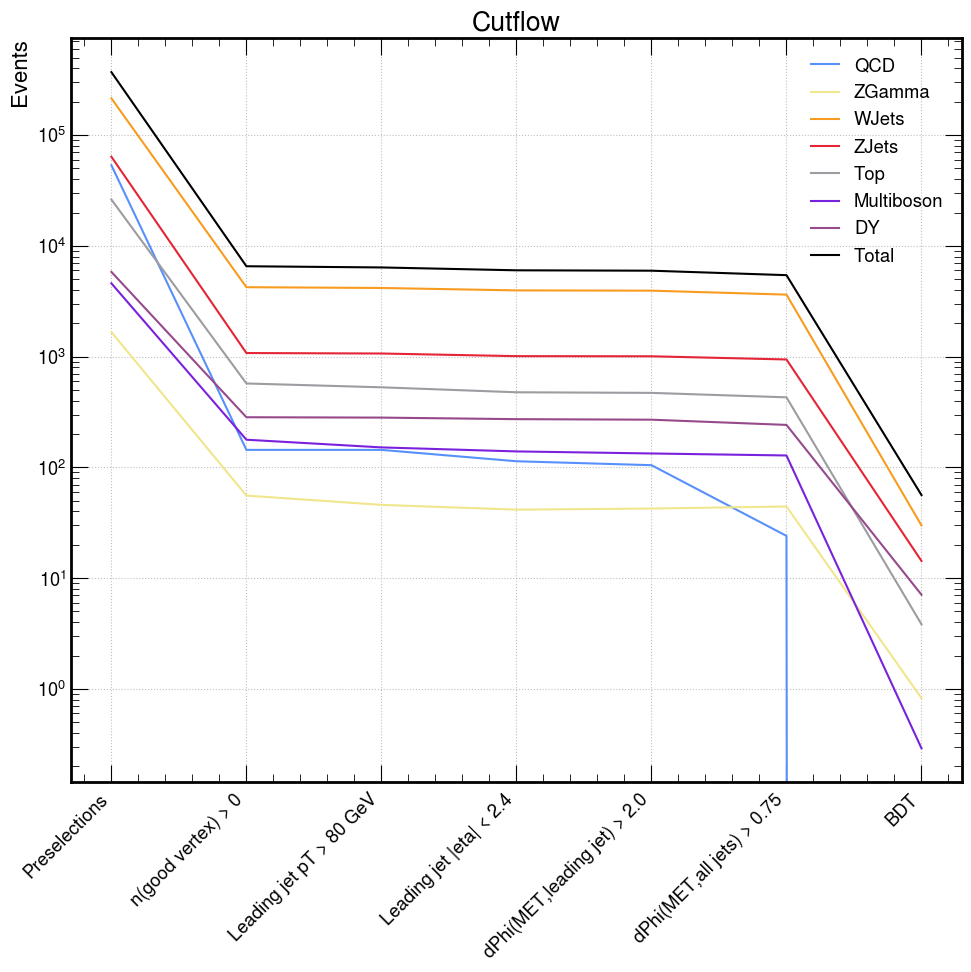

In [37]:
df = utils.get_bkg_cutflow_df(bkg_histo, 'cutflow_cts')

fig, axes = plt.subplots()

plot_dict_bkg_eff = {
    # Select processes
    'processes': 'all', # Otherwise, give as a list; ['WJets', 'ZJets', 'Total']

    # Plot display styling
    'ylim': None, # None for default; otherwise [ymin, ymax]
    'doLog': True,
    
    'ylabel': 'Events', # None for default
    'title': rf"Cutflow", 

    # Plot saving
    'doSave': True,
    'outDir': f'./plots/{suffix}/cutflow/',
    'outName': f'Cutflow_background.png'
}

# For all processes
ptools.plot_bkg_efficiency(bkg_histo, df, plot_dict_bkg_eff)

Saved: ./plots/BDT_v4_goodVtx_v10_Tight_bjetMed/cutflow//Cutflow_background.png


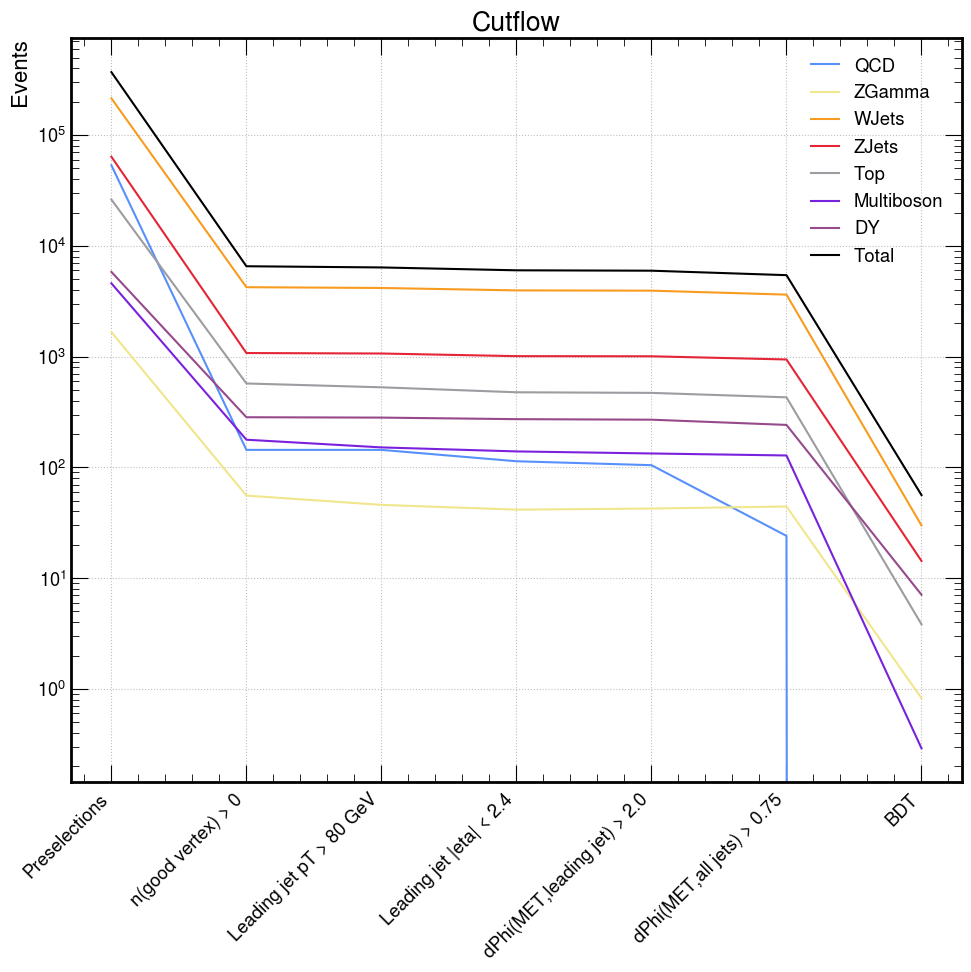

In [38]:
df = utils.get_bkg_cutflow_df(bkg_histo, 'cutflow_cts')

fig, axes = plt.subplots()

plot_dict_bkg_eff = {
    # Select processes
    'processes': 'all', # Otherwise, give as a list; ['WJets', 'ZJets', 'Total']

    # Plot display styling
    'ylim': None, # None for default; otherwise [ymin, ymax]
    'doLog': True,
    
    'ylabel': 'Events', # None for default
    'title': rf"Cutflow", 

    # Plot saving
    'doSave': True,
    'outDir': f'./plots/{suffix}/cutflow/',
    'outName': f'Cutflow_background.png'
}

# For all processes
ptools.plot_bkg_efficiency(bkg_histo, df, plot_dict_bkg_eff)

In [64]:
cuts = utils.get_signal_list_of_cuts(sig_histo)

cuts[1] = 'n(good vertex) > 0 && 0 < N(Jets) < 3'
#cuts[2] = 'b-jet veto loose WP'
cuts[2] = r"Leading jet $p_{T} > 80$ GeV"
cuts[3] = r"Leading jet $|\eta| < 2.4$"
cuts[4] = r"$|\Delta\phi(p_{T}^{miss},$leading jet)$| > 2.0$"
cuts[5] = r"min$|\Delta\phi(p_{T}^{miss},$all jets)$| < 0.75$"
cuts[6] = r"Pass BDT"

print(cuts)

['Preselections', 'n(good vertex) > 0 && 0 < N(Jets) < 3', 'Leading jet $p_{T} > 80$ GeV', 'Leading jet $|\\eta| < 2.4$', '$|\\Delta\\phi(p_{T}^{miss},$leading jet)$| > 2.0$', 'min$|\\Delta\\phi(p_{T}^{miss},$all jets)$| < 0.75$', 'Pass BDT']


In [65]:
table = cts_cutflow
table.columns = cuts

In [66]:
sig_cdict = {
    '5': "#3f90da", 
    '10': "#ffa90e", 
    '20': "#bd1f01", 
    '30': "#94a4a2", 
    '40': "#832db6", 
    '50': "#a96b59", 
    '60': "#e76300", 
    '70': "#b9ac70", 
    '80': "#717581", 
    '90': "#92dadd",
    '100': "#2ca02c"

}

In [67]:
import mplhep as hep
hep.style.use("CMS")

plt.rcParams["figure.figsize"] = (18,13)

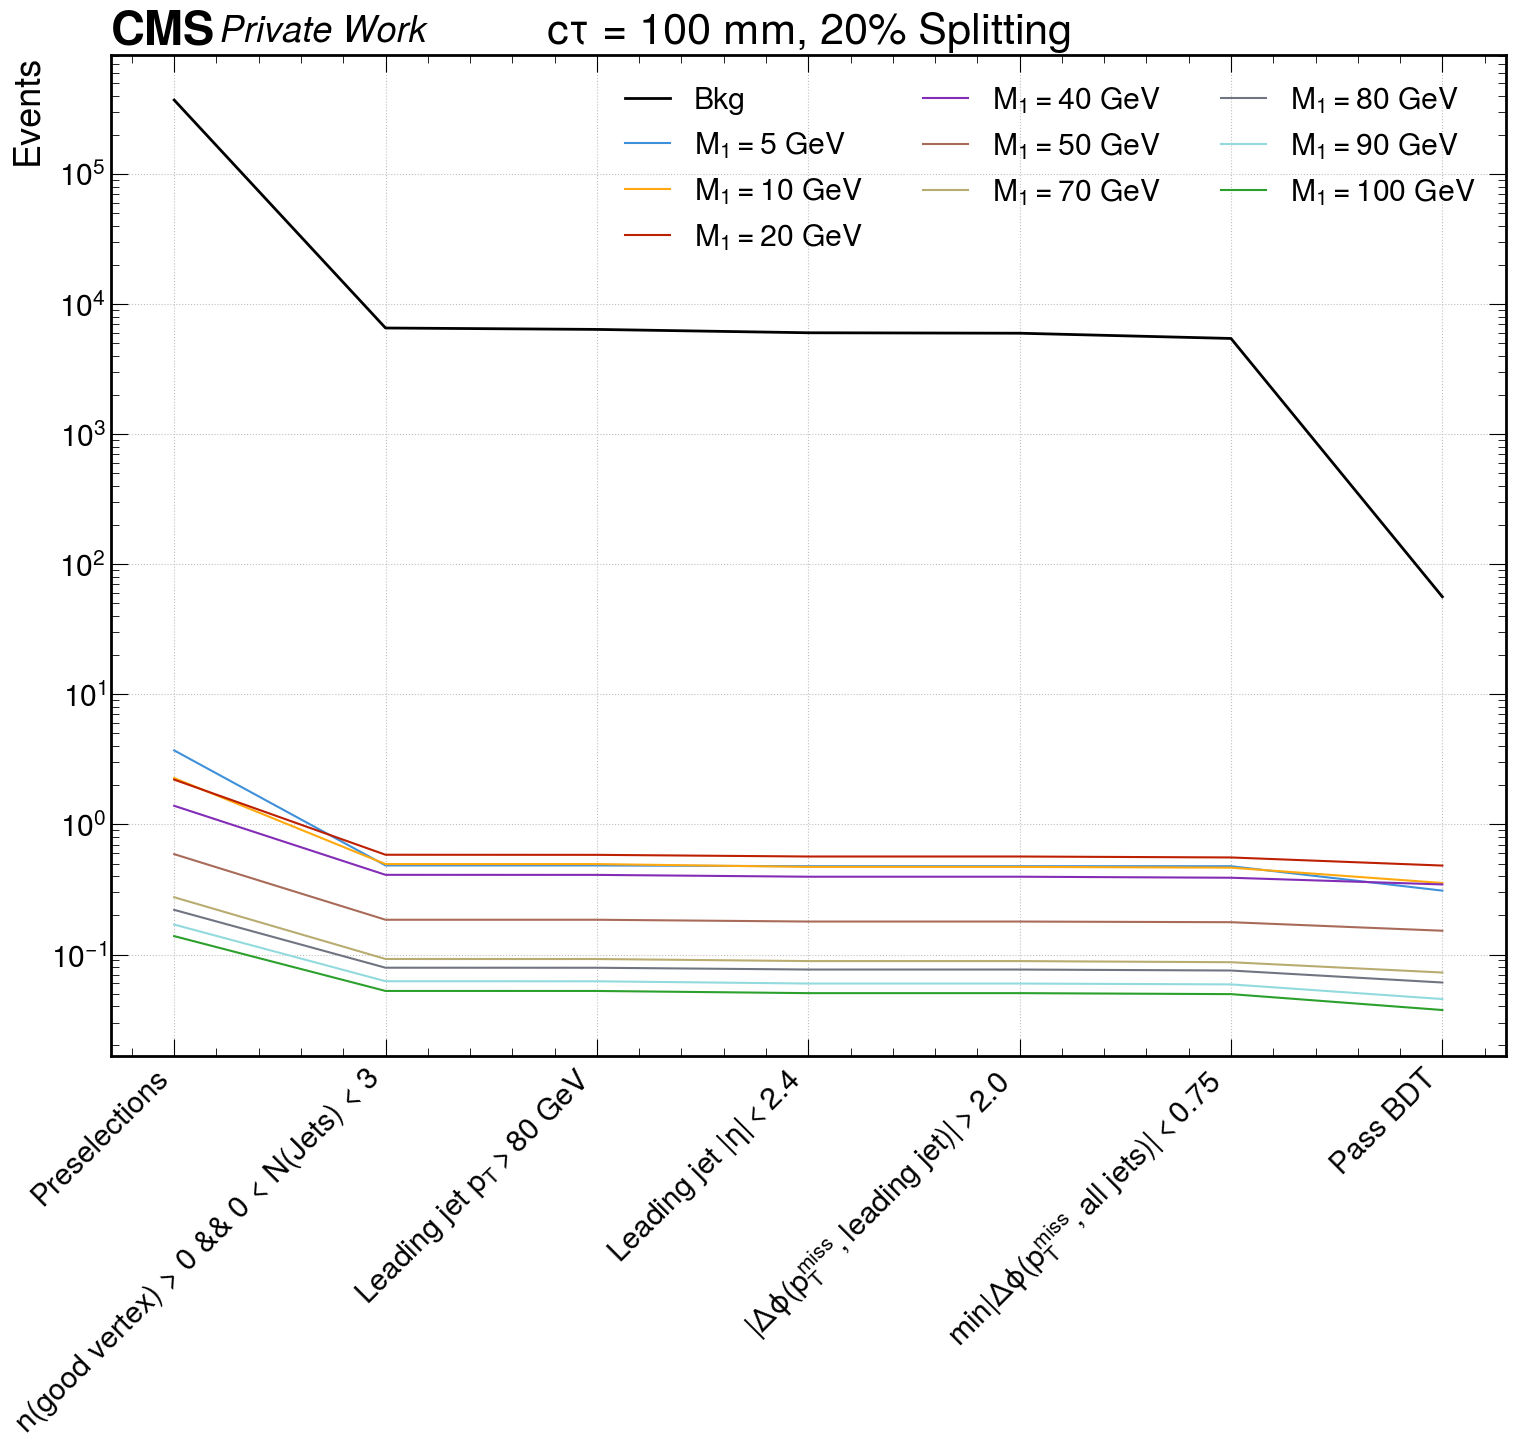

In [68]:
hep.cms.label('', data=False, llabel='Private Work', rlabel='')

ct = 1
delt = 0.1

points = (si["ctau"] == ct)

df = table.loc[list(si[points].name)]
df

m1_list = []
for point in df.index.values:
    sig_dict = ptools.signalPoint(point)
    m1 = int(sig_dict['m1'])
    m1_list.append(m1)

df['m1'] = m1_list
df = df.sort_values(by=['m1']) # sort by m1
df.pop('m1')

plt.plot(cuts, bkg_cts_df.loc['Total'], label='Bkg', color='black', linewidth=2)


for point in df.index.values:
    sig_dict = ptools.signalPoint(point)
    m1 = int(sig_dict['m1'])
    delta = sig_dict['delta']
    dmchi = sig_dict['dmchi']
    ctau = int(sig_dict['ctau'])

    if (ctau == ct) and (delta == delt) and (m1 != 30):
        #print(ctau, delta)
        plt.plot(cuts, df.loc[point], label=rf"$M_{1} = {m1:.0f}$ GeV", color=sig_cdict[str(m1)])


plt.grid()
    
plt.ylabel("Events")
plt.title(rf"c$\tau$ = {ct} mm, {int(delt*100)}% Splitting")
    
plt.xticks(ticks = np.arange(len(cuts)), labels = cuts, rotation = 45, ha = 'right')

plt.yscale('log')
plt.legend(loc='upper right', ncols=3)


plt.savefig(f'cutflow_preBDT_ct{ct}_delta{str(delt).replace(".","p")}.pdf', bbox_inches = "tight")

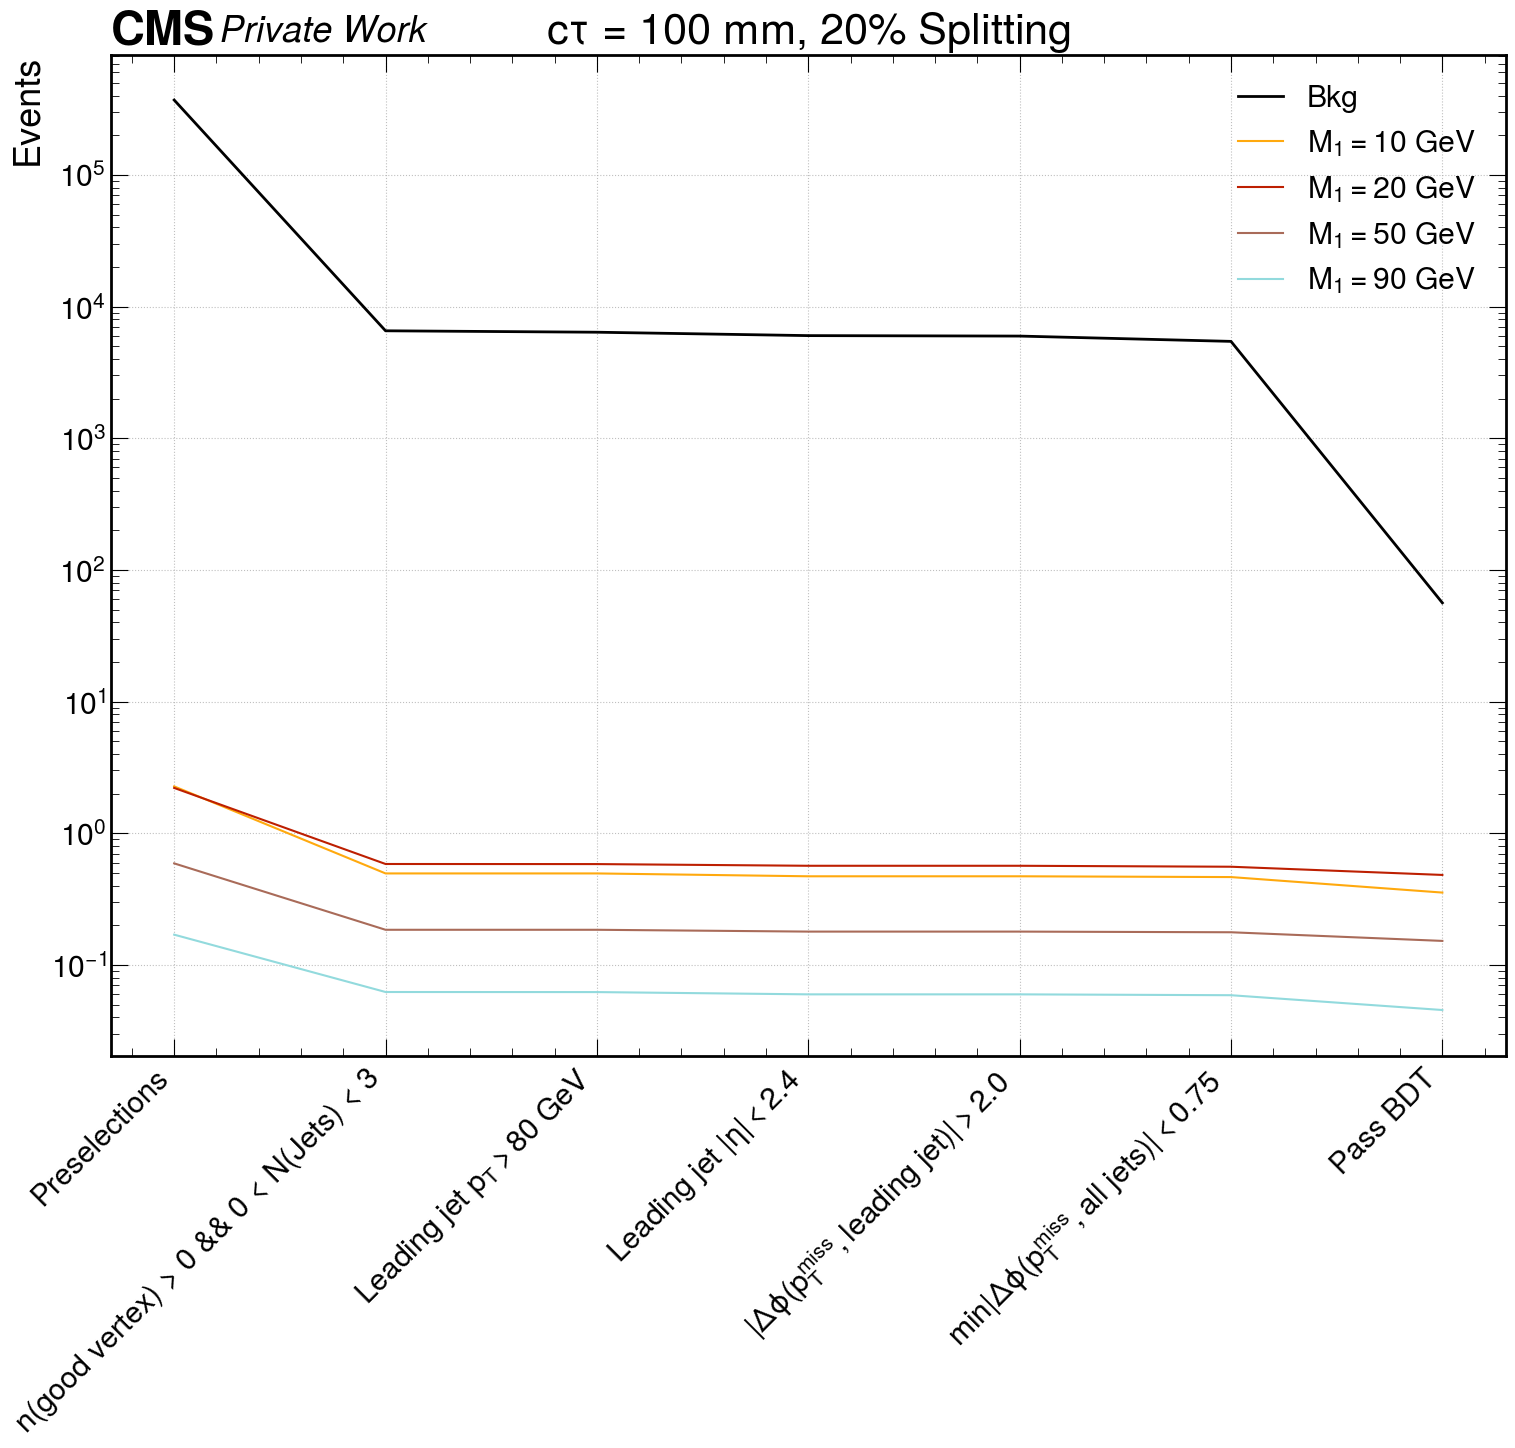

In [77]:
hep.cms.label('', data=False, llabel='Private Work', rlabel='')

ct = 100
delt = 0.2

points = (si["ctau"] == ct)

df = table.loc[list(si[points].name)]
df

m1_list = []
for point in df.index.values:
    sig_dict = ptools.signalPoint(point)
    m1 = int(sig_dict['m1'])
    m1_list.append(m1)

df['m1'] = m1_list
df = df.sort_values(by=['m1']) # sort by m1
df.pop('m1')

plt.plot(cuts, bkg_cts_df.loc['Total'], label='Bkg', color='black', linewidth=2)

m1s = [10, 20, 50, 90]

for point in df.index.values:
    sig_dict = ptools.signalPoint(point)
    m1 = int(sig_dict['m1'])
    delta = sig_dict['delta']
    dmchi = sig_dict['dmchi']
    ctau = int(sig_dict['ctau'])

    if (ctau == ct) and (delta == delt) and (m1 in m1s):
        #print(ctau, delta)
        plt.plot(cuts, df.loc[point], label=rf"$M_{1} = {m1:.0f}$ GeV", color=sig_cdict[str(m1)])


plt.grid()
    
plt.ylabel("Events")
plt.title(rf"c$\tau$ = {ct} mm, {int(delt*100)}% Splitting")
    
plt.xticks(ticks = np.arange(len(cuts)), labels = cuts, rotation = 45, ha = 'right')

plt.yscale('log')
plt.legend(loc='upper right', ncols=1)


plt.savefig(f'cutflow_SR_ct{ct}_delta{str(delt).replace(".","p")}.pdf', bbox_inches = "tight")

['Preselections', 'n(good vertex) > 0 && N(Jets) > 2', 'Leading jet pT > 80 GeV', 'Leading jet |eta| < 2.4', 'dPhi(MET,leading jet) > 2.0', 'dPhi(MET,all jets) > 0.75', 'BDT']
Saved: ./plots/cutflow//Cutflow_SR_signal_delta_0p1_ct_1_m50to100.png


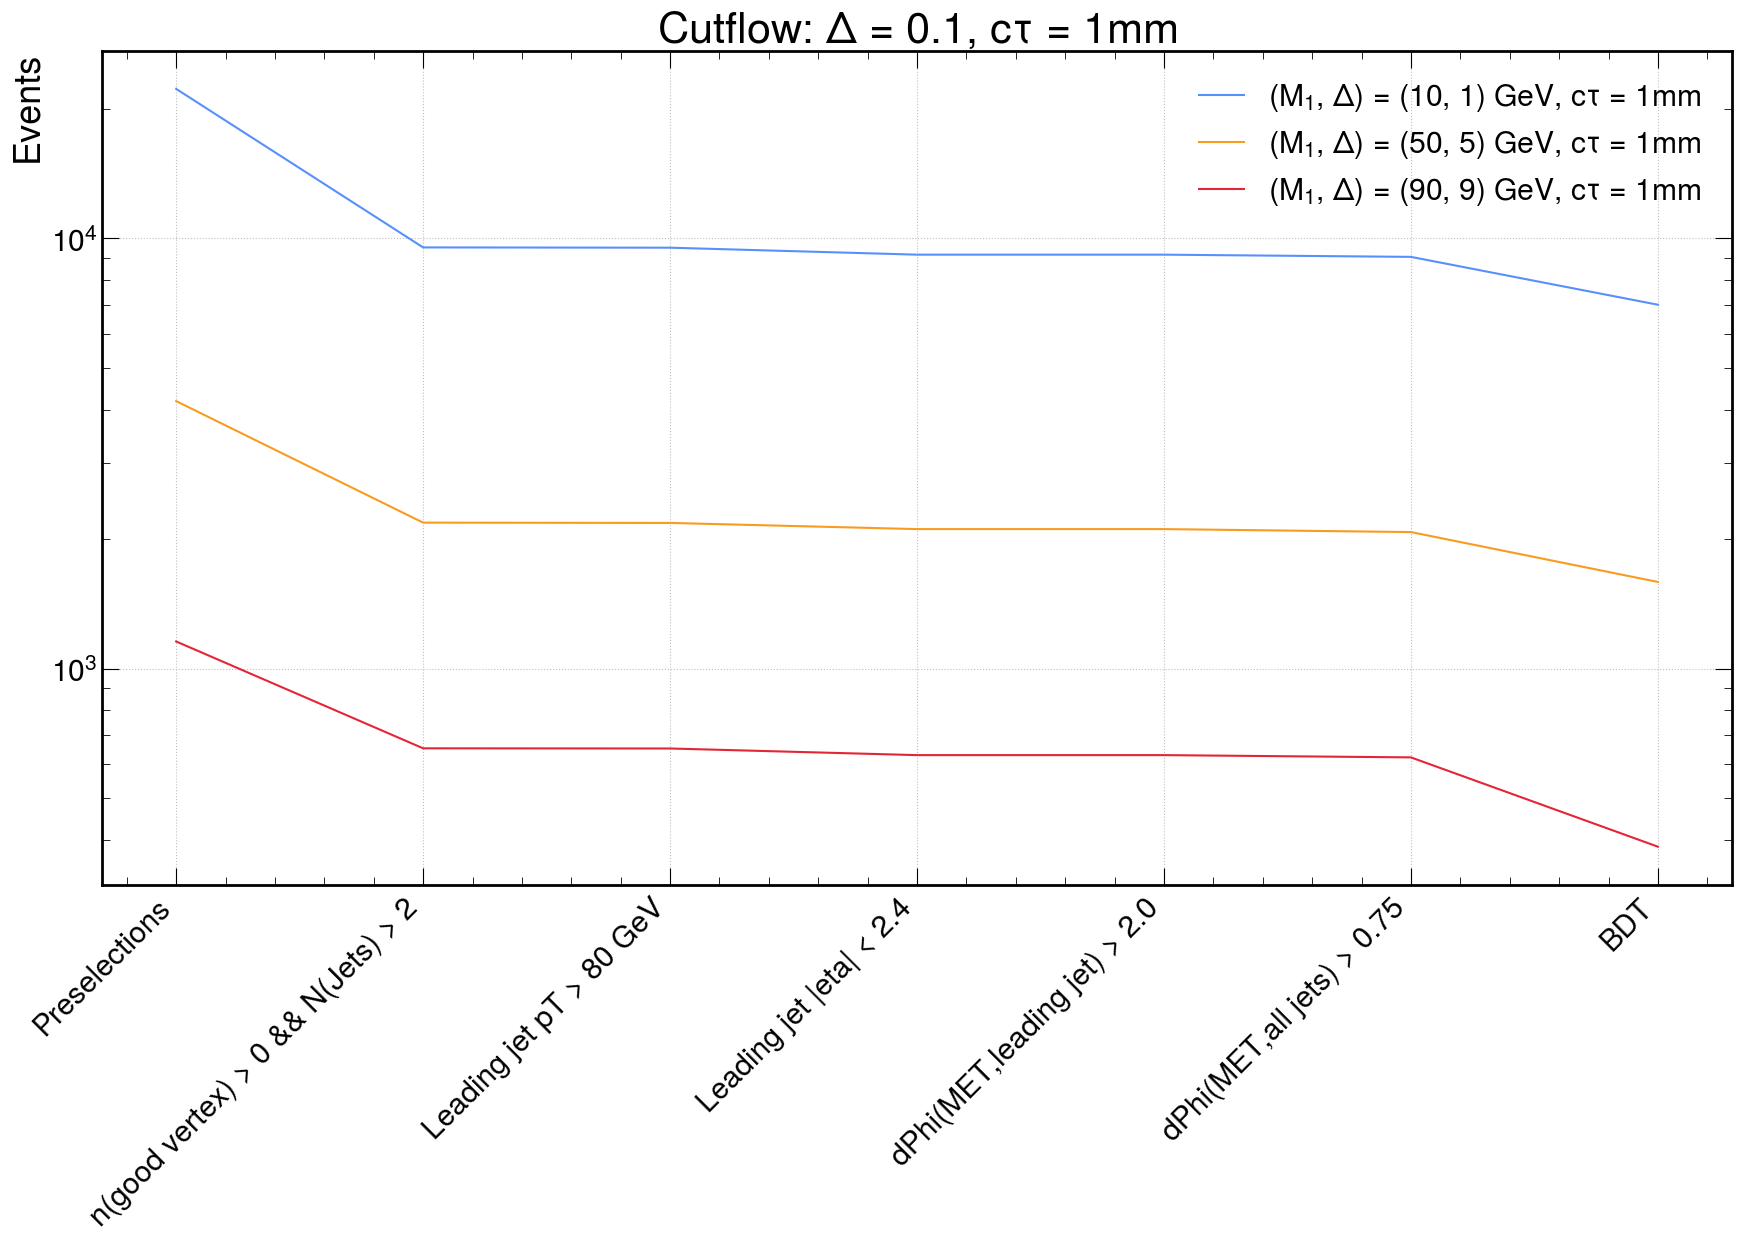

['Preselections', 'n(good vertex) > 0 && N(Jets) > 2', 'Leading jet pT > 80 GeV', 'Leading jet |eta| < 2.4', 'dPhi(MET,leading jet) > 2.0', 'dPhi(MET,all jets) > 0.75', 'BDT']
Saved: ./plots/cutflow//Cutflow_SR_signal_delta_0p1_ct_10_m50to100.png


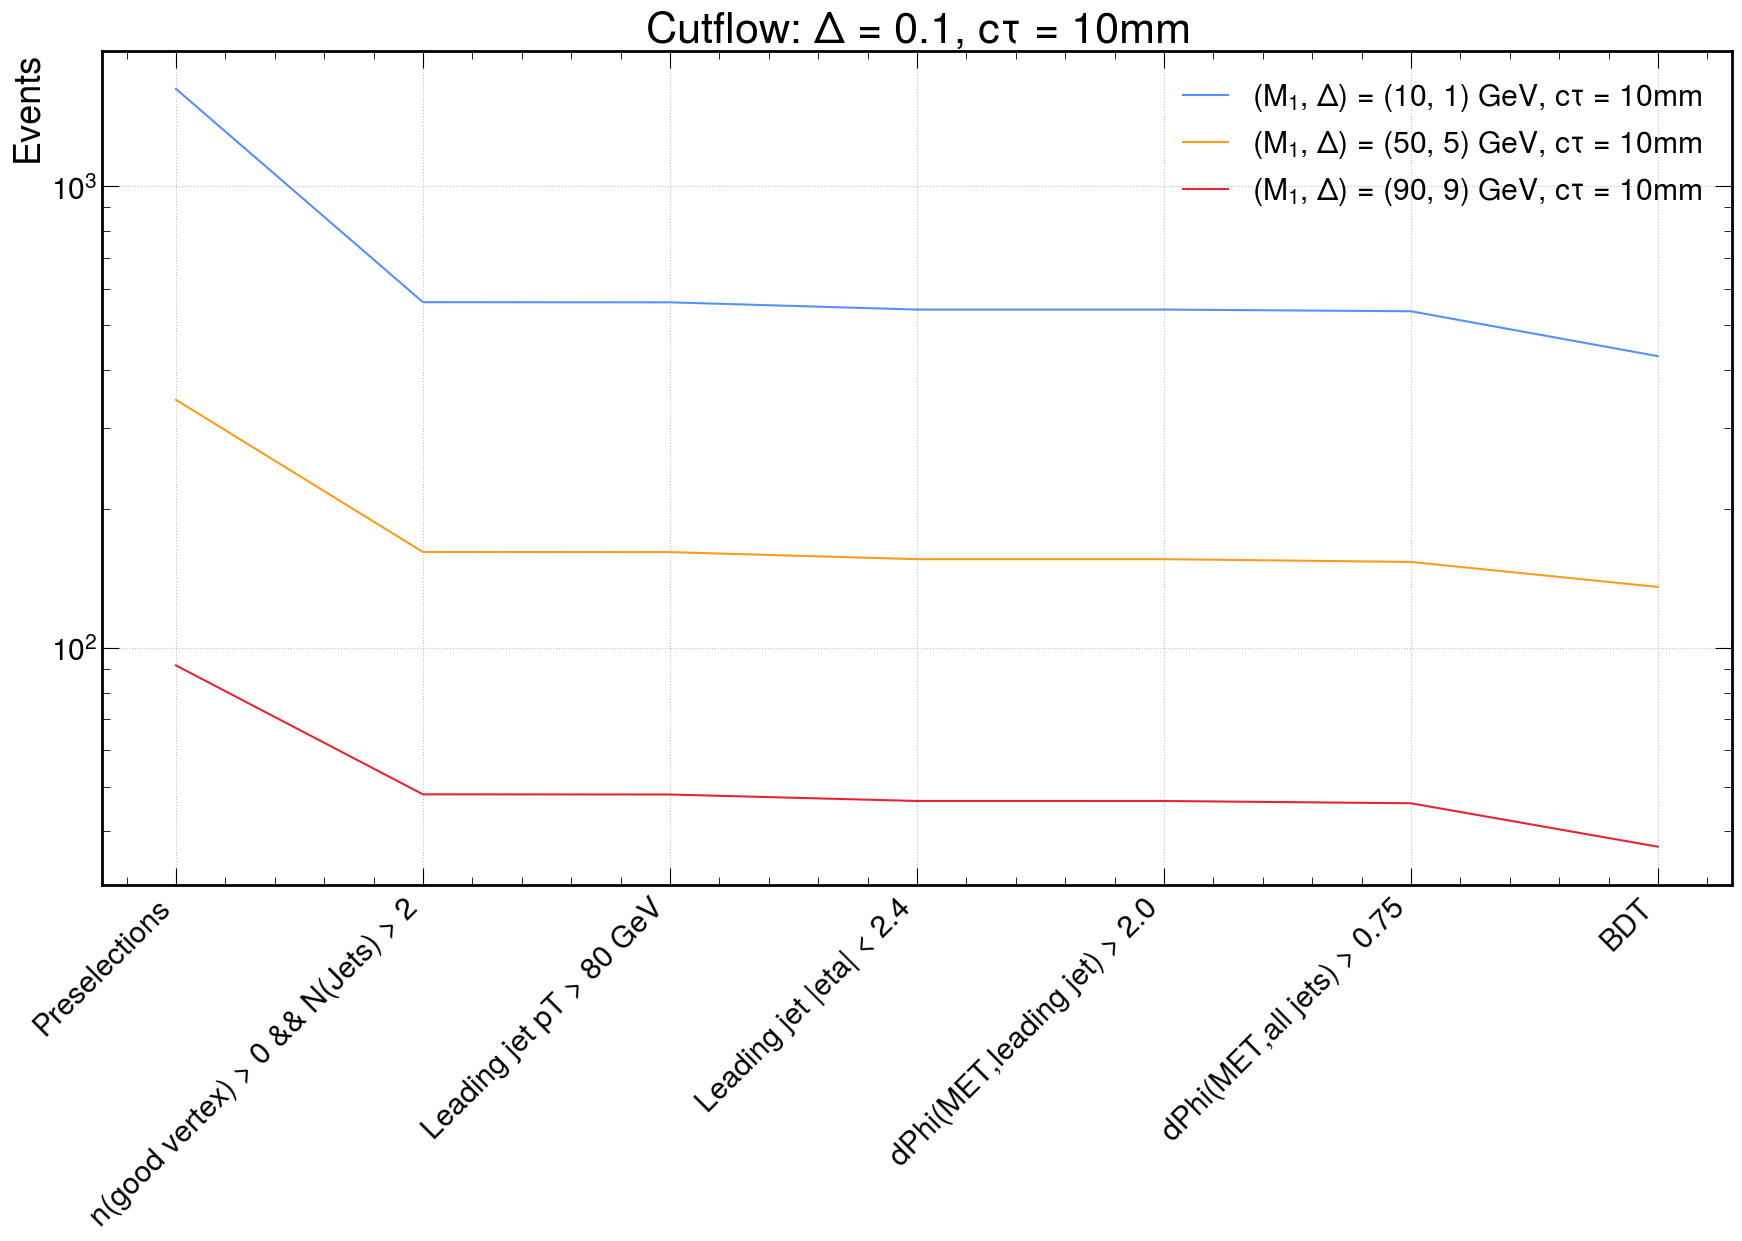

['Preselections', 'n(good vertex) > 0 && N(Jets) > 2', 'Leading jet pT > 80 GeV', 'Leading jet |eta| < 2.4', 'dPhi(MET,leading jet) > 2.0', 'dPhi(MET,all jets) > 0.75', 'BDT']
Saved: ./plots/cutflow//Cutflow_SR_signal_delta_0p1_ct_100_m50to100.png


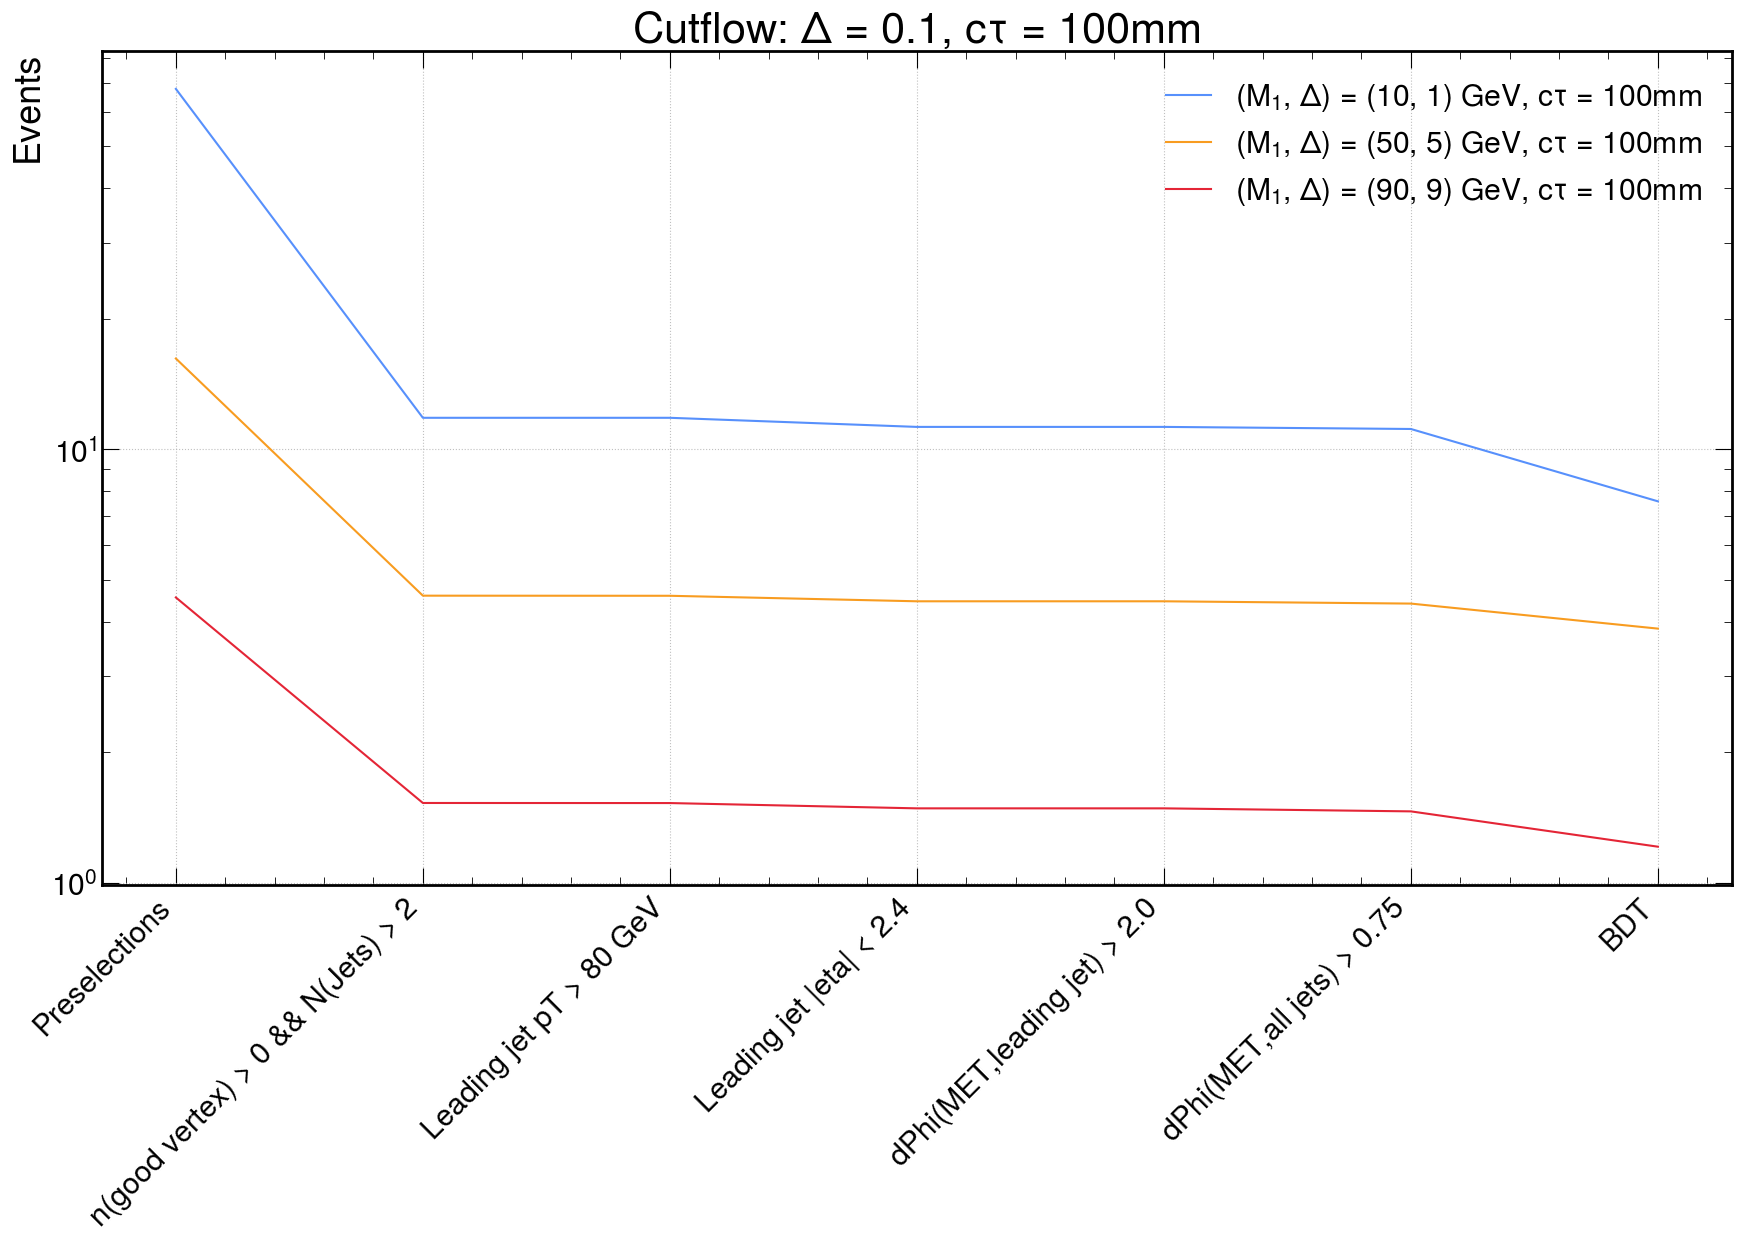

['Preselections', 'n(good vertex) > 0 && N(Jets) > 2', 'Leading jet pT > 80 GeV', 'Leading jet |eta| < 2.4', 'dPhi(MET,leading jet) > 2.0', 'dPhi(MET,all jets) > 0.75', 'BDT']
Saved: ./plots/cutflow//Cutflow_SR_signal_delta_0p2_ct_1_m50to100.png


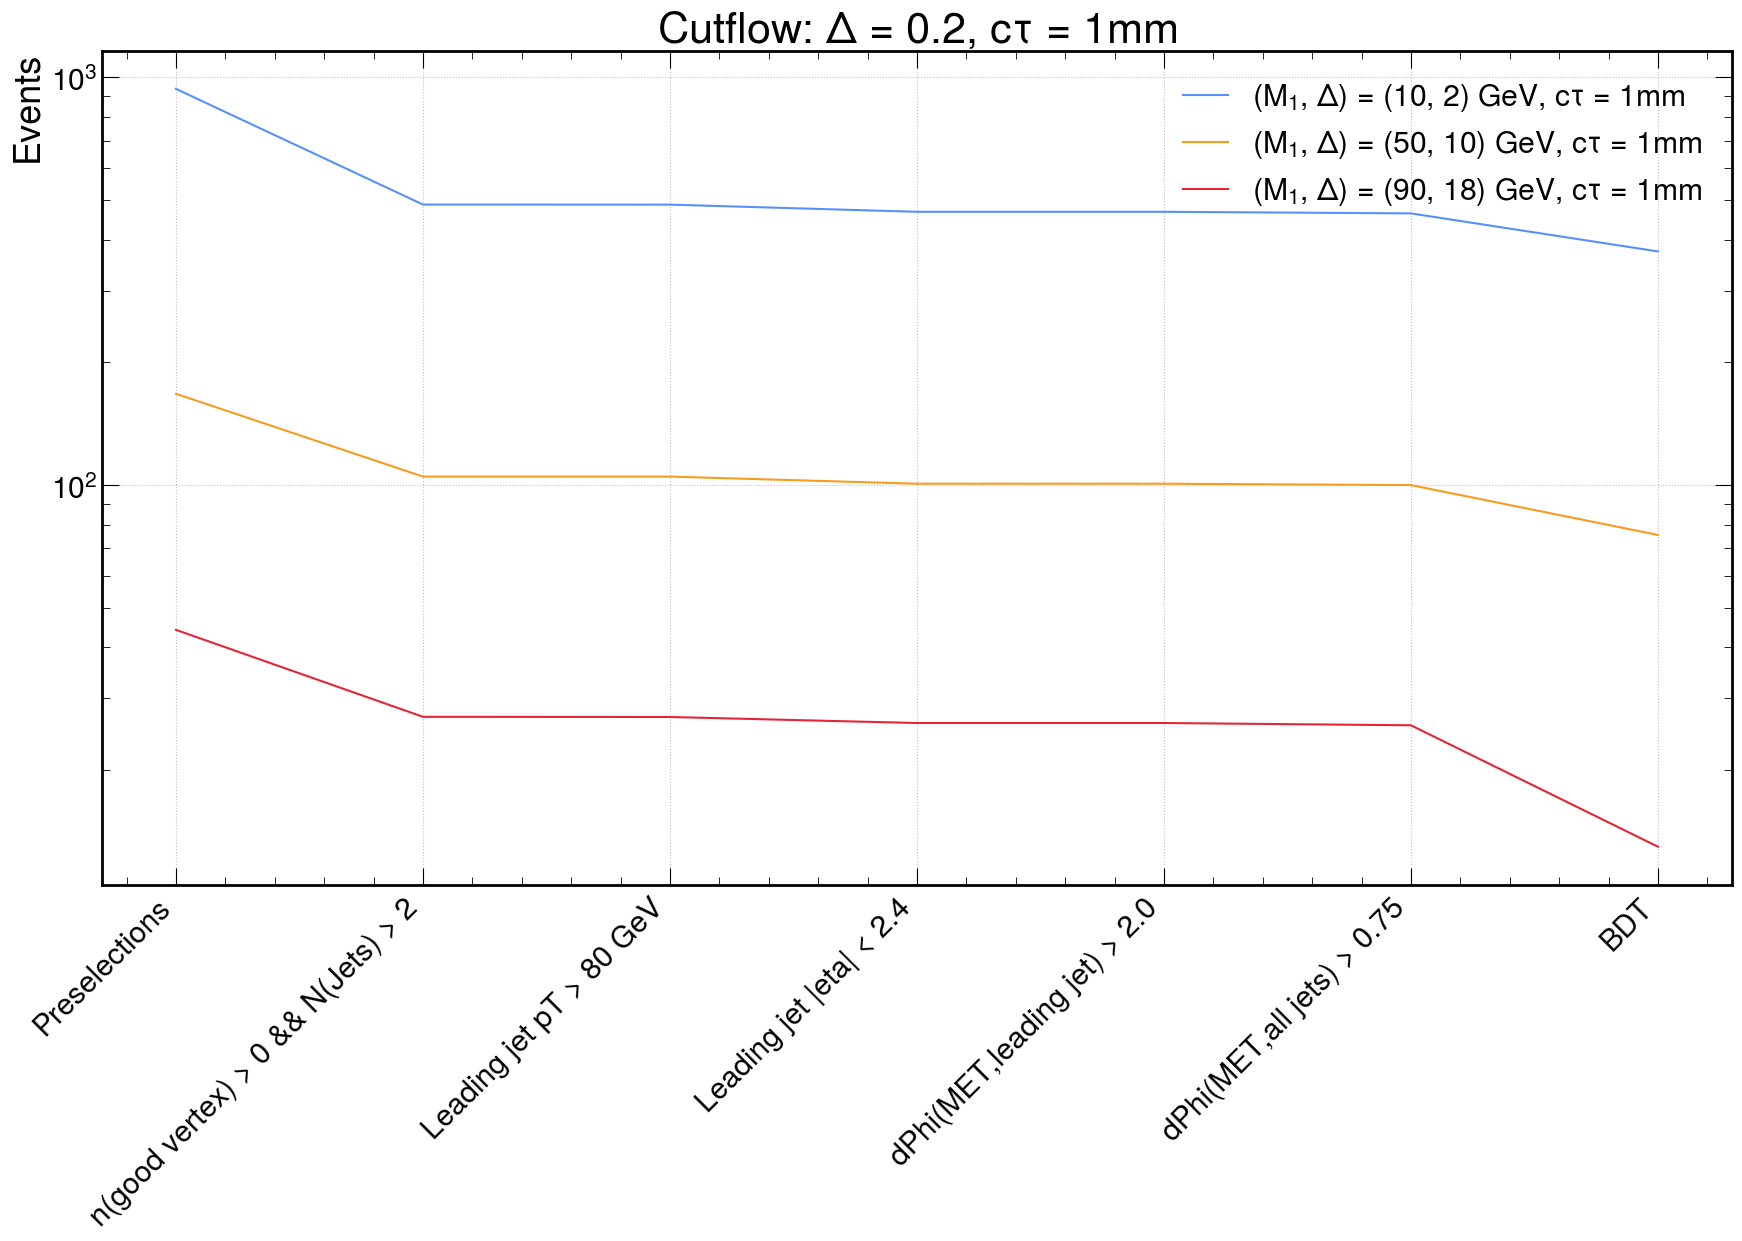

['Preselections', 'n(good vertex) > 0 && N(Jets) > 2', 'Leading jet pT > 80 GeV', 'Leading jet |eta| < 2.4', 'dPhi(MET,leading jet) > 2.0', 'dPhi(MET,all jets) > 0.75', 'BDT']
Saved: ./plots/cutflow//Cutflow_SR_signal_delta_0p2_ct_10_m50to100.png


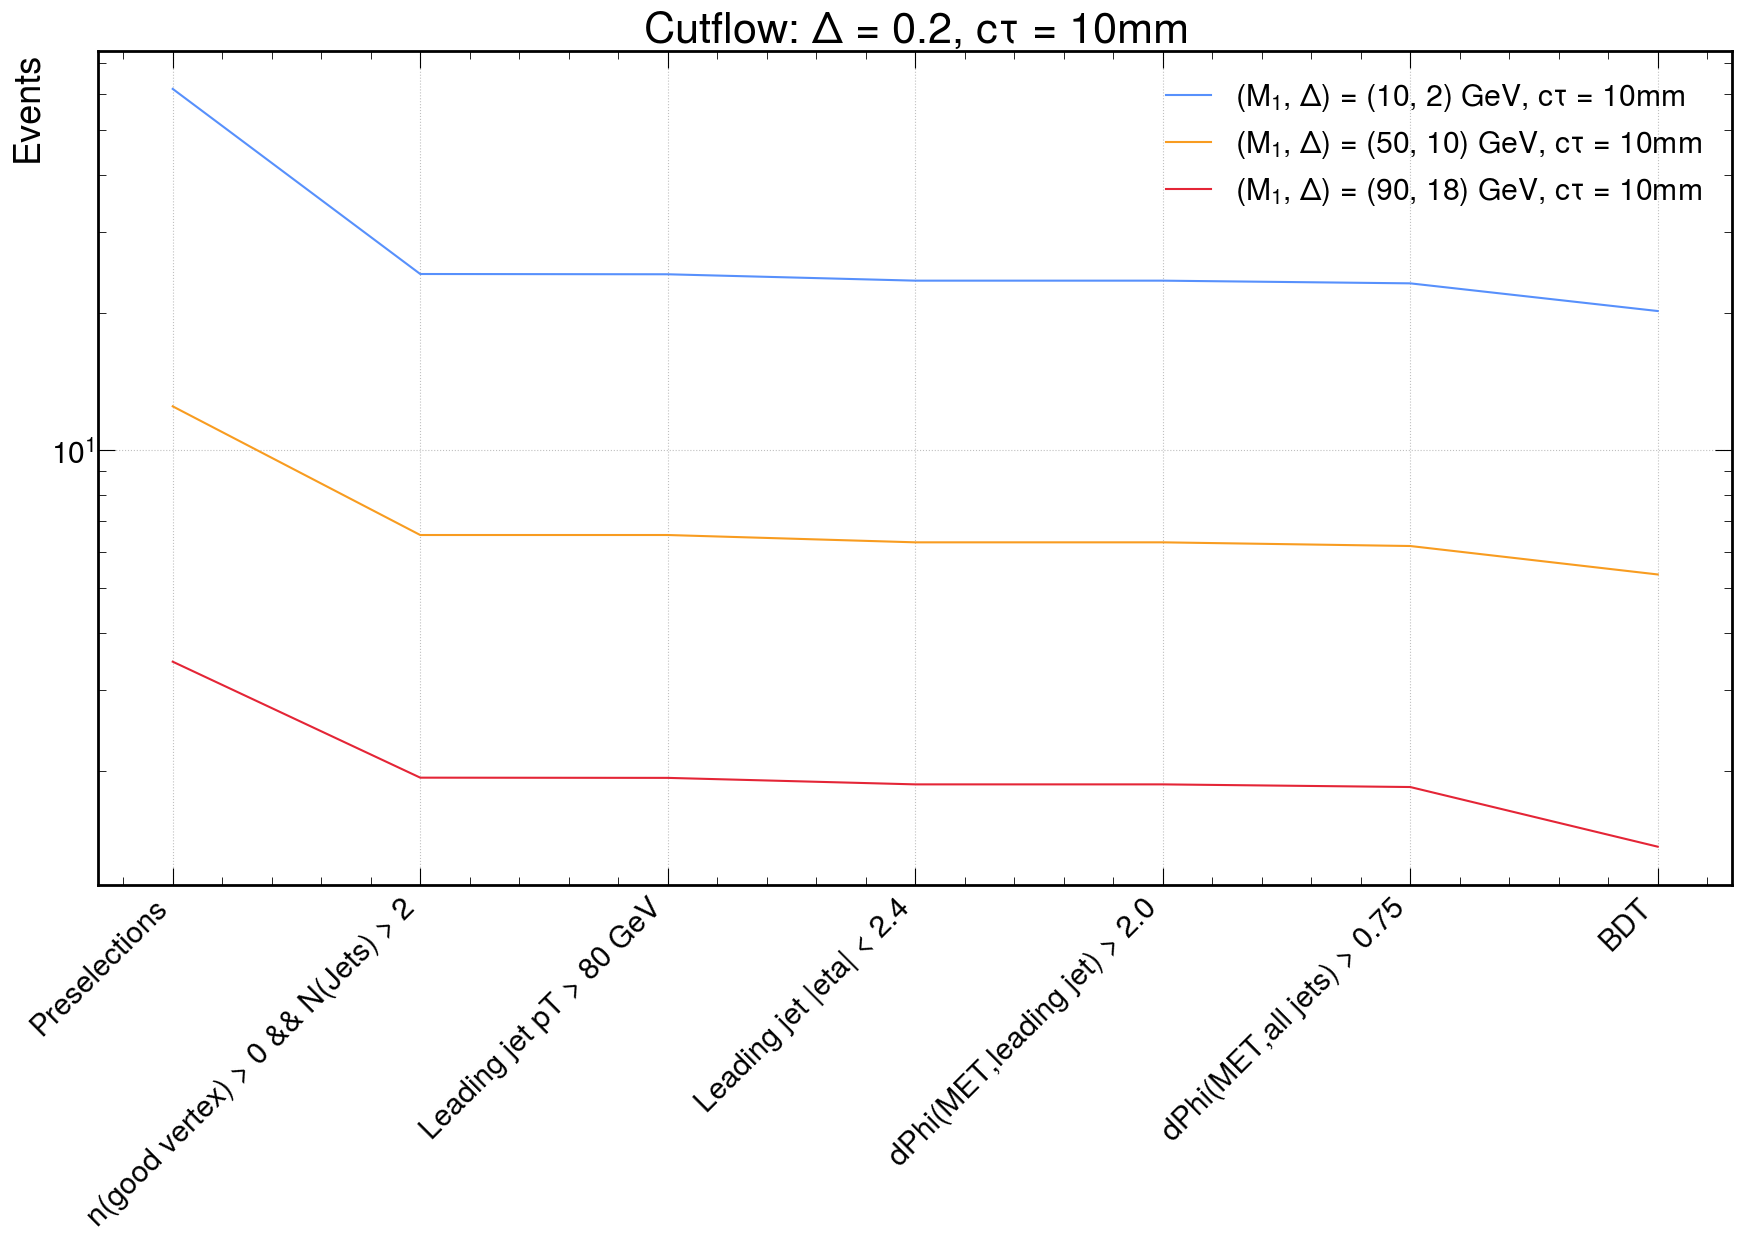

['Preselections', 'n(good vertex) > 0 && N(Jets) > 2', 'Leading jet pT > 80 GeV', 'Leading jet |eta| < 2.4', 'dPhi(MET,leading jet) > 2.0', 'dPhi(MET,all jets) > 0.75', 'BDT']
Saved: ./plots/cutflow//Cutflow_SR_signal_delta_0p2_ct_100_m50to100.png


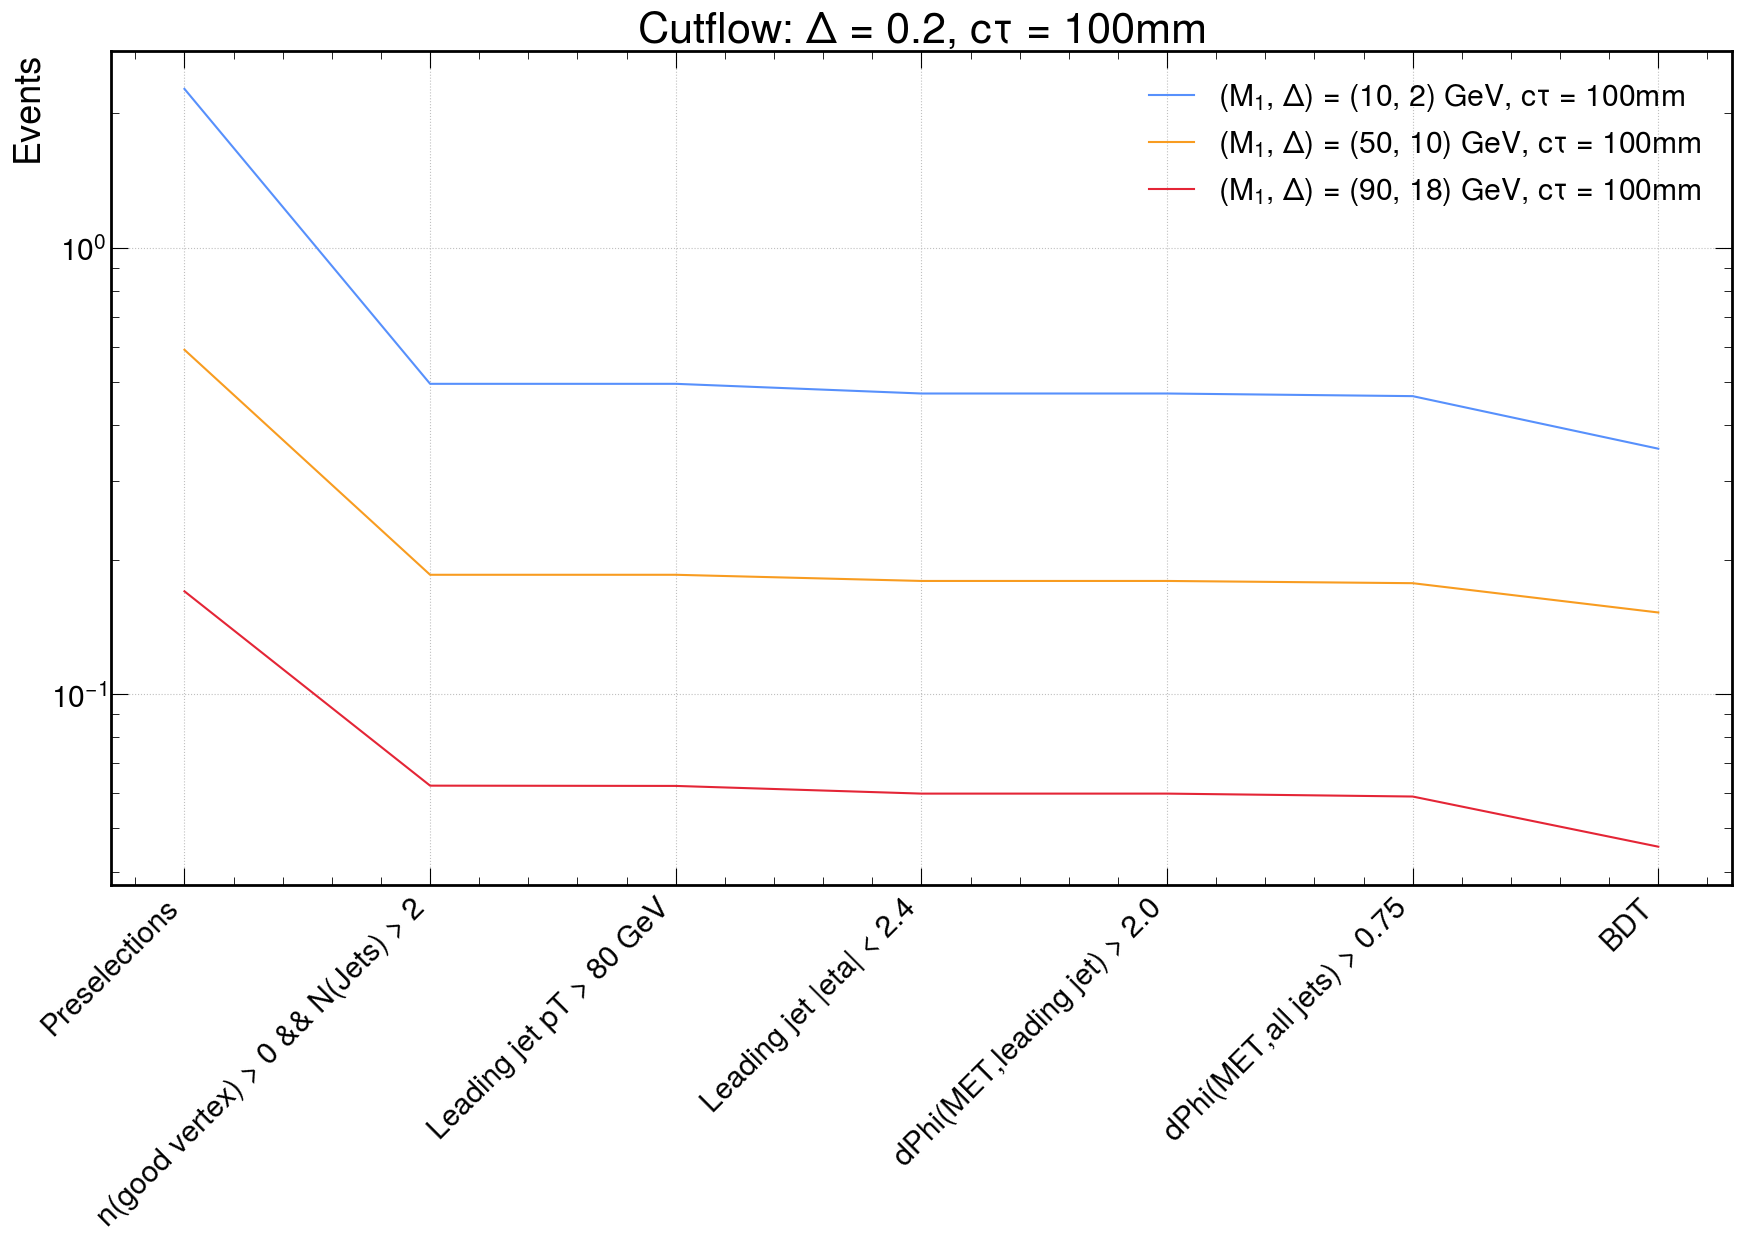

In [70]:
df = utils.get_signal_cutflow_dict(sig_histo, 'cutflow_cts')

fig, axes = plt.subplots()

plot_dict_sig_eff = {
    # Select signal points to display
    'm1s': [10, 50, 90],
    'deltas': [0.1, 0.2],
    'ctaus': [1, 10, 100],

    # Plot display styling
    'ylim': None, # None for default; otherwise [ymin, ymax]
    'doLog': True,
    
    'ylabel': 'Events', # None for default
    'title': rf"Cutflow", 

    # Plot saving
    'doSave': True,
    'outDir': './plots/cutflow/',
    'outName': ''
}

# Delta 0.1 1mm

for delta in [0.1, 0.2]:
    for ctau in [1, 10, 100]:
        plot_dict_sig_eff['deltas'] = [delta]
        plot_dict_sig_eff['ctaus'] = [ctau]
        
        plot_dict_sig_eff['title'] = rf"Cutflow: $\Delta$ = {delta}, c$\tau$ = {ctau}mm"
        plot_dict_sig_eff['outName'] = rf"Cutflow_SR_signal_delta_{str(delta).replace('.', 'p')}_ct_{ctau}_m50to100.png"
        
        ptools.plot_signal_efficiency(sig_histo, df, plot_dict_sig_eff)

## S/B

In [48]:
bkg_cts_df = utils.get_bkg_cutflow_df(bkg_histo, 'cutflow_cts')
nBkg = bkg_cts_df.loc['Total'][-1]

nBkg

56.22739683096611

In [49]:
cts_cutflow = utils.get_signal_cutflow_dict(sig_histo, 'cutflow_cts')
table = cts_cutflow

cutnames = utils.get_signal_list_of_cuts(sig_histo)
table.columns = cutnames

In [50]:
pd.options.display.float_format = '{:,.4f}'.format


In [51]:
df = pd.DataFrame(table.loc[:, cutnames[-1]]) # last cut
df = utils.add_signal_info_to_df(df)
df

BDT       m1  delta     ctau
sig_2018_Mchi-5p25_dMchi-0p5_ctau-1     6,329.6354   5.0000 0.1000   1.0000
sig_2018_Mchi-5p25_dMchi-0p5_ctau-100       4.7649   5.0000 0.1000 100.0000
sig_2018_Mchi-5p25_dMchi-0p5_ctau-10      319.0852   5.0000 0.1000  10.0000
sig_2018_Mchi-5p5_dMchi-1p0_ctau-1        497.2188   5.0000 0.2000   1.0000
sig_2018_Mchi-5p5_dMchi-1p0_ctau-10        22.3073   5.0000 0.2000  10.0000
...                                            ...      ...    ...      ...
sig_2018_Mchi-110p0_dMchi-20p0_ctau-10      1.0548 100.0000 0.2000  10.0000
sig_2018_Mchi-110p0_dMchi-20p0_ctau-1       9.3925 100.0000 0.2000   1.0000
sig_2018_Mchi-105p0_dMchi-10p0_ctau-1     283.2182 100.0000 0.1000   1.0000
sig_2018_Mchi-105p0_dMchi-10p0_ctau-100     0.9728 100.0000 0.1000 100.0000
sig_2018_Mchi-105p0_dMchi-10p0_ctau-10     28.8545 100.0000 0.1000  10.0000

[62 rows x 4 columns]

In [52]:
# Missing rows
#df[ (df['m1'] == 60) & (df['delta'] == 0.2) ]

df.loc[len(df.index)] = [0, 60, 0.2, 1]
df.loc[len(df.index)] = [0, 60, 0.2, 10]
df.loc[len(df.index)] = [0, 60, 0.2, 100]
df.loc[len(df.index)] = [0, 80, 0.2, 1] 

df = df.sort_values(by=['m1']) # sort by m1

In [53]:
df = df.rename(columns={df.columns[0]: 'Signal'})

df['Background'] = nBkg
df['S/sqrt(B)'] = df['Signal'] / np.sqrt(df['Background'])

df = df[['m1', 'delta', 'ctau', 'Signal', 'Background', 'S/sqrt(B)']]

df

m1  delta     ctau     Signal  \
sig_2018_Mchi-5p25_dMchi-0p5_ctau-1       5.0000 0.1000   1.0000 6,329.6354   
sig_2018_Mchi-5p25_dMchi-0p5_ctau-100     5.0000 0.1000 100.0000     4.7649   
sig_2018_Mchi-5p25_dMchi-0p5_ctau-10      5.0000 0.1000  10.0000   319.0852   
sig_2018_Mchi-5p5_dMchi-1p0_ctau-1        5.0000 0.2000   1.0000   497.2188   
sig_2018_Mchi-5p5_dMchi-1p0_ctau-10       5.0000 0.2000  10.0000    22.3073   
...                                          ...    ...      ...        ...   
sig_2018_Mchi-110p0_dMchi-20p0_ctau-1   100.0000 0.2000   1.0000     9.3925   
sig_2018_Mchi-105p0_dMchi-10p0_ctau-1   100.0000 0.1000   1.0000   283.2182   
sig_2018_Mchi-105p0_dMchi-10p0_ctau-100 100.0000 0.1000 100.0000     0.9728   
sig_2018_Mchi-105p0_dMchi-10p0_ctau-10  100.0000 0.1000  10.0000    28.8545   
sig_2018_Mchi-110p0_dMchi-20p0_ctau-10  100.0000 0.2000  10.0000     1.0548   

                                         Background  S/sqrt(B)  
sig_2018_Mchi-5p25_dMchi-0p5_ctau-1         56.2274   844.1210  
sig_2018_Mchi-5p25_dMchi-0p5_ctau-100       56.2274     0.6354  
sig_2018_Mchi-5p25_dMchi-0p5_ctau-10        56.2274    42.5532  
sig_2018_Mchi-5p5_dMchi-1p0_ctau-1          56.2274    66.3092  
sig_2018_Mchi-5p5_dMchi-1p0_ctau-10         56.2274     2.9749  
...                                             ...        ...  
sig_2018_Mchi-110p0_dMchi-20p0_ctau-1       56.2274     1.2526  
sig_2018_Mchi-105p0_dMchi-10p0_ctau-1       56.2274    37.7700  
sig_2018_Mchi-105p0_dMchi-10p0_ctau-100     56.2274     0.1297  
sig_2018_Mchi-105p0_dMchi-10p0_ctau-10      56.2274     3.8480  
sig_2018_Mchi-110p0_dMchi-20p0_ctau-10      56.2274     0.1407  

[66 rows x 6 columns]

In [54]:
outdir = './csv/SR_Yields/'
outname = f'SR_S_over_B'

df_to_save = df

utils.save_df_to_csv(df_to_save, outdir, outname)

Saved: ./csv/SR_Yields//SR_S_over_B.csv


In [55]:
ct = 1.0


In [56]:
pd.options.display.float_format = '{:,.4f}'.format

# S/sqrt(B) in ctau = 1mm, delta = 0.1
delta = 0.1

df_to_show = df[ (df.ctau == ct) & (df.delta == delta) ]
df_to_show.loc[:, 'm1'] = df_to_show.loc[:, 'm1'].map('{:,.1f}'.format)
df_to_show.loc[:, 'delta'] = df_to_show.loc[:, 'delta'].map('{:,.1f}'.format)
df_to_show.loc[:, 'ctau'] = df_to_show.loc[:, 'ctau'].map('{:,.1f}'.format)

df_to_show

m1 delta ctau     Signal  \
sig_2018_Mchi-5p25_dMchi-0p5_ctau-1      5.0   0.1  1.0 6,329.6354   
sig_2018_Mchi-10p5_dMchi-1p0_ctau-1     10.0   0.1  1.0 7,007.3259   
sig_2018_Mchi-21p0_dMchi-2p0_ctau-1     20.0   0.1  1.0 6,719.5448   
sig_2018_Mchi-31p5_dMchi-3p0_ctau-1     30.0   0.1  1.0 7,766.0181   
sig_2018_Mchi-42p0_dMchi-4p0_ctau-1     40.0   0.1  1.0 3,933.7939   
sig_2018_Mchi-52p5_dMchi-5p0_ctau-1     50.0   0.1  1.0 1,590.7389   
sig_2018_Mchi-63p0_dMchi-6p0_ctau-1     60.0   0.1  1.0   981.1175   
sig_2018_Mchi-73p5_dMchi-7p0_ctau-1     70.0   0.1  1.0   701.1156   
sig_2018_Mchi-84p0_dMchi-8p0_ctau-1     80.0   0.1  1.0   493.8594   
sig_2018_Mchi-94p5_dMchi-9p0_ctau-1     90.0   0.1  1.0   386.0315   
sig_2018_Mchi-105p0_dMchi-10p0_ctau-1  100.0   0.1  1.0   283.2182   

                                       Background  S/sqrt(B)  
sig_2018_Mchi-5p25_dMchi-0p5_ctau-1       56.2274   844.1210  
sig_2018_Mchi-10p5_dMchi-1p0_ctau-1       56.2274   934.4979  
sig_2018_Mchi-21p0_dMchi-2p0_ctau-1       56.2274   896.1194  
sig_2018_Mchi-31p5_dMchi-3p0_ctau-1       56.2274 1,035.6772  
sig_2018_Mchi-42p0_dMchi-4p0_ctau-1       56.2274   524.6113  
sig_2018_Mchi-52p5_dMchi-5p0_ctau-1       56.2274   212.1412  
sig_2018_Mchi-63p0_dMchi-6p0_ctau-1       56.2274   130.8420  
sig_2018_Mchi-73p5_dMchi-7p0_ctau-1       56.2274    93.5009  
sig_2018_Mchi-84p0_dMchi-8p0_ctau-1       56.2274    65.8611  
sig_2018_Mchi-94p5_dMchi-9p0_ctau-1       56.2274    51.4812  
sig_2018_Mchi-105p0_dMchi-10p0_ctau-1     56.2274    37.7700

In [57]:
pd.options.display.float_format = '{:,.4f}'.format

# S/sqrt(B) in ctau = 1mm, delta = 0.2
delta = 0.2

df_to_show = df[ (df.ctau == ct) & (df.delta == delta) ]
df_to_show.loc[:, 'm1'] = df_to_show.loc[:, 'm1'].map('{:,.1f}'.format)
df_to_show.loc[:, 'delta'] = df_to_show.loc[:, 'delta'].map('{:,.1f}'.format)
df_to_show.loc[:, 'ctau'] = df_to_show.loc[:, 'ctau'].map('{:,.1f}'.format)

df_to_show

m1 delta ctau      Signal  \
sig_2018_Mchi-5p5_dMchi-1p0_ctau-1       5.0   0.2  1.0    497.2188   
sig_2018_Mchi-11p0_dMchi-2p0_ctau-1     10.0   0.2  1.0    374.2637   
sig_2018_Mchi-22p0_dMchi-4p0_ctau-1     20.0   0.2  1.0    327.8360   
sig_2018_Mchi-33p0_dMchi-6p0_ctau-1     30.0   0.2  1.0 17,333.1687   
sig_2018_Mchi-44p0_dMchi-8p0_ctau-1     40.0   0.2  1.0    181.1325   
sig_2018_Mchi-55p0_dMchi-10p0_ctau-1    50.0   0.2  1.0     75.4922   
62                                      60.0   0.2  1.0      0.0000   
sig_2018_Mchi-77p0_dMchi-14p0_ctau-1    70.0   0.2  1.0     26.2830   
65                                      80.0   0.2  1.0      0.0000   
sig_2018_Mchi-99p0_dMchi-18p0_ctau-1    90.0   0.2  1.0     12.9847   
sig_2018_Mchi-110p0_dMchi-20p0_ctau-1  100.0   0.2  1.0      9.3925   

                                       Background  S/sqrt(B)  
sig_2018_Mchi-5p5_dMchi-1p0_ctau-1        56.2274    66.3092  
sig_2018_Mchi-11p0_dMchi-2p0_ctau-1       56.2274    49.9118  
sig_2018_Mchi-22p0_dMchi-4p0_ctau-1       56.2274    43.7202  
sig_2018_Mchi-33p0_dMchi-6p0_ctau-1       56.2274 2,311.5536  
sig_2018_Mchi-44p0_dMchi-8p0_ctau-1       56.2274    24.1559  
sig_2018_Mchi-55p0_dMchi-10p0_ctau-1      56.2274    10.0676  
62                                        56.2274     0.0000  
sig_2018_Mchi-77p0_dMchi-14p0_ctau-1      56.2274     3.5051  
65                                        56.2274     0.0000  
sig_2018_Mchi-99p0_dMchi-18p0_ctau-1      56.2274     1.7316  
sig_2018_Mchi-110p0_dMchi-20p0_ctau-1     56.2274     1.2526

In [58]:
ct = 10.0


In [59]:
pd.options.display.float_format = '{:,.4f}'.format

# S/sqrt(B) in ctau = 1mm, delta = 0.1
delta = 0.1

df_to_show = df[ (df.ctau == ct) & (df.delta == delta) ]
df_to_show.loc[:, 'm1'] = df_to_show.loc[:, 'm1'].map('{:,.1f}'.format)
df_to_show.loc[:, 'delta'] = df_to_show.loc[:, 'delta'].map('{:,.1f}'.format)
df_to_show.loc[:, 'ctau'] = df_to_show.loc[:, 'ctau'].map('{:,.1f}'.format)

df_to_show

m1 delta  ctau     Signal  \
sig_2018_Mchi-5p25_dMchi-0p5_ctau-10      5.0   0.1  10.0   319.0852   
sig_2018_Mchi-10p5_dMchi-1p0_ctau-10     10.0   0.1  10.0   428.4458   
sig_2018_Mchi-21p0_dMchi-2p0_ctau-10     20.0   0.1  10.0   518.5572   
sig_2018_Mchi-31p5_dMchi-3p0_ctau-10     30.0   0.1  10.0 5,250.4990   
sig_2018_Mchi-42p0_dMchi-4p0_ctau-10     40.0   0.1  10.0   334.8556   
sig_2018_Mchi-52p5_dMchi-5p0_ctau-10     50.0   0.1  10.0   135.4805   
sig_2018_Mchi-63p0_dMchi-6p0_ctau-10     60.0   0.1  10.0    87.2995   
sig_2018_Mchi-73p5_dMchi-7p0_ctau-10     70.0   0.1  10.0    63.8018   
sig_2018_Mchi-84p0_dMchi-8p0_ctau-10     80.0   0.1  10.0    47.8042   
sig_2018_Mchi-94p5_dMchi-9p0_ctau-10     90.0   0.1  10.0    37.0728   
sig_2018_Mchi-105p0_dMchi-10p0_ctau-10  100.0   0.1  10.0    28.8545   

                                        Background  S/sqrt(B)  
sig_2018_Mchi-5p25_dMchi-0p5_ctau-10       56.2274    42.5532  
sig_2018_Mchi-10p5_dMchi-1p0_ctau-10       56.2274    57.1376  
sig_2018_Mchi-21p0_dMchi-2p0_ctau-10       56.2274    69.1549  
sig_2018_Mchi-31p5_dMchi-3p0_ctau-10       56.2274   700.2072  
sig_2018_Mchi-42p0_dMchi-4p0_ctau-10       56.2274    44.6564  
sig_2018_Mchi-52p5_dMchi-5p0_ctau-10       56.2274    18.0677  
sig_2018_Mchi-63p0_dMchi-6p0_ctau-10       56.2274    11.6423  
sig_2018_Mchi-73p5_dMchi-7p0_ctau-10       56.2274     8.5086  
sig_2018_Mchi-84p0_dMchi-8p0_ctau-10       56.2274     6.3752  
sig_2018_Mchi-94p5_dMchi-9p0_ctau-10       56.2274     4.9440  
sig_2018_Mchi-105p0_dMchi-10p0_ctau-10     56.2274     3.8480

In [60]:
pd.options.display.float_format = '{:,.4f}'.format

# S/sqrt(B) in ctau = 1mm, delta = 0.2
delta = 0.2

df_to_show = df[ (df.ctau == ct) & (df.delta == delta) ]
df_to_show.loc[:, 'm1'] = df_to_show.loc[:, 'm1'].map('{:,.1f}'.format)
df_to_show.loc[:, 'delta'] = df_to_show.loc[:, 'delta'].map('{:,.1f}'.format)
df_to_show.loc[:, 'ctau'] = df_to_show.loc[:, 'ctau'].map('{:,.1f}'.format)

df_to_show

m1 delta  ctau     Signal  \
sig_2018_Mchi-5p5_dMchi-1p0_ctau-10       5.0   0.2  10.0    22.3073   
sig_2018_Mchi-11p0_dMchi-2p0_ctau-10     10.0   0.2  10.0    20.1481   
sig_2018_Mchi-22p0_dMchi-4p0_ctau-10     20.0   0.2  10.0    21.3346   
sig_2018_Mchi-33p0_dMchi-6p0_ctau-10     30.0   0.2  10.0 4,044.9357   
sig_2018_Mchi-44p0_dMchi-8p0_ctau-10     40.0   0.2  10.0    13.2686   
sig_2018_Mchi-55p0_dMchi-10p0_ctau-10    50.0   0.2  10.0     5.3600   
63                                       60.0   0.2  10.0     0.0000   
sig_2018_Mchi-77p0_dMchi-14p0_ctau-10    70.0   0.2  10.0     2.3966   
sig_2018_Mchi-88p0_dMchi-16p0_ctau-10    80.0   0.2  10.0     1.7576   
sig_2018_Mchi-99p0_dMchi-18p0_ctau-10    90.0   0.2  10.0     1.3643   
sig_2018_Mchi-110p0_dMchi-20p0_ctau-10  100.0   0.2  10.0     1.0548   

                                        Background  S/sqrt(B)  
sig_2018_Mchi-5p5_dMchi-1p0_ctau-10        56.2274     2.9749  
sig_2018_Mchi-11p0_dMchi-2p0_ctau-10       56.2274     2.6870  
sig_2018_Mchi-22p0_dMchi-4p0_ctau-10       56.2274     2.8452  
sig_2018_Mchi-33p0_dMchi-6p0_ctau-10       56.2274   539.4332  
sig_2018_Mchi-44p0_dMchi-8p0_ctau-10       56.2274     1.7695  
sig_2018_Mchi-55p0_dMchi-10p0_ctau-10      56.2274     0.7148  
63                                         56.2274     0.0000  
sig_2018_Mchi-77p0_dMchi-14p0_ctau-10      56.2274     0.3196  
sig_2018_Mchi-88p0_dMchi-16p0_ctau-10      56.2274     0.2344  
sig_2018_Mchi-99p0_dMchi-18p0_ctau-10      56.2274     0.1819  
sig_2018_Mchi-110p0_dMchi-20p0_ctau-10     56.2274     0.1407

In [61]:
ct = 100.0


In [62]:
pd.options.display.float_format = '{:,.4f}'.format

# S/sqrt(B) in ctau = 1mm, delta = 0.1
delta = 0.1

df_to_show = df[ (df.ctau == ct) & (df.delta == delta) ]
df_to_show.loc[:, 'm1'] = df_to_show.loc[:, 'm1'].map('{:,.1f}'.format)
df_to_show.loc[:, 'delta'] = df_to_show.loc[:, 'delta'].map('{:,.1f}'.format)
df_to_show.loc[:, 'ctau'] = df_to_show.loc[:, 'ctau'].map('{:,.1f}'.format)

df_to_show

m1 delta   ctau     Signal  \
sig_2018_Mchi-5p25_dMchi-0p5_ctau-100      5.0   0.1  100.0     4.7649   
sig_2018_Mchi-10p5_dMchi-1p0_ctau-100     10.0   0.1  100.0     7.5859   
sig_2018_Mchi-21p0_dMchi-2p0_ctau-100     20.0   0.1  100.0    11.2969   
sig_2018_Mchi-31p5_dMchi-3p0_ctau-100     30.0   0.1  100.0 1,701.1872   
sig_2018_Mchi-42p0_dMchi-4p0_ctau-100     40.0   0.1  100.0     8.3933   
sig_2018_Mchi-52p5_dMchi-5p0_ctau-100     50.0   0.1  100.0     3.8577   
sig_2018_Mchi-63p0_dMchi-6p0_ctau-100     60.0   0.1  100.0     2.5735   
sig_2018_Mchi-73p5_dMchi-7p0_ctau-100     70.0   0.1  100.0     1.8759   
sig_2018_Mchi-84p0_dMchi-8p0_ctau-100     80.0   0.1  100.0     1.5085   
sig_2018_Mchi-94p5_dMchi-9p0_ctau-100     90.0   0.1  100.0     1.2111   
sig_2018_Mchi-105p0_dMchi-10p0_ctau-100  100.0   0.1  100.0     0.9728   

                                         Background  S/sqrt(B)  
sig_2018_Mchi-5p25_dMchi-0p5_ctau-100       56.2274     0.6354  
sig_2018_Mchi-10p5_dMchi-1p0_ctau-100       56.2274     1.0117  
sig_2018_Mchi-21p0_dMchi-2p0_ctau-100       56.2274     1.5066  
sig_2018_Mchi-31p5_dMchi-3p0_ctau-100       56.2274   226.8705  
sig_2018_Mchi-42p0_dMchi-4p0_ctau-100       56.2274     1.1193  
sig_2018_Mchi-52p5_dMchi-5p0_ctau-100       56.2274     0.5145  
sig_2018_Mchi-63p0_dMchi-6p0_ctau-100       56.2274     0.3432  
sig_2018_Mchi-73p5_dMchi-7p0_ctau-100       56.2274     0.2502  
sig_2018_Mchi-84p0_dMchi-8p0_ctau-100       56.2274     0.2012  
sig_2018_Mchi-94p5_dMchi-9p0_ctau-100       56.2274     0.1615  
sig_2018_Mchi-105p0_dMchi-10p0_ctau-100     56.2274     0.1297

In [63]:
pd.options.display.float_format = '{:,.4f}'.format

# S/sqrt(B) in ctau = 1mm, delta = 0.2
delta = 0.2

df_to_show = df[ (df.ctau == ct) & (df.delta == delta) ]
df_to_show.loc[:, 'm1'] = df_to_show.loc[:, 'm1'].map('{:,.1f}'.format)
df_to_show.loc[:, 'delta'] = df_to_show.loc[:, 'delta'].map('{:,.1f}'.format)
df_to_show.loc[:, 'ctau'] = df_to_show.loc[:, 'ctau'].map('{:,.1f}'.format)

df_to_show

m1 delta   ctau   Signal  \
sig_2018_Mchi-5p5_dMchi-1p0_ctau-100       5.0   0.2  100.0   0.3098   
sig_2018_Mchi-11p0_dMchi-2p0_ctau-100     10.0   0.2  100.0   0.3546   
sig_2018_Mchi-22p0_dMchi-4p0_ctau-100     20.0   0.2  100.0   0.4828   
sig_2018_Mchi-33p0_dMchi-6p0_ctau-100     30.0   0.2  100.0 117.6579   
sig_2018_Mchi-44p0_dMchi-8p0_ctau-100     40.0   0.2  100.0   0.3457   
sig_2018_Mchi-55p0_dMchi-10p0_ctau-100    50.0   0.2  100.0   0.1523   
64                                        60.0   0.2  100.0   0.0000   
sig_2018_Mchi-77p0_dMchi-14p0_ctau-100    70.0   0.2  100.0   0.0727   
sig_2018_Mchi-88p0_dMchi-16p0_ctau-100    80.0   0.2  100.0   0.0609   
sig_2018_Mchi-99p0_dMchi-18p0_ctau-100    90.0   0.2  100.0   0.0455   
sig_2018_Mchi-110p0_dMchi-20p0_ctau-100  100.0   0.2  100.0   0.0374   

                                         Background  S/sqrt(B)  
sig_2018_Mchi-5p5_dMchi-1p0_ctau-100        56.2274     0.0413  
sig_2018_Mchi-11p0_dMchi-2p0_ctau-100       56.2274     0.0473  
sig_2018_Mchi-22p0_dMchi-4p0_ctau-100       56.2274     0.0644  
sig_2018_Mchi-33p0_dMchi-6p0_ctau-100       56.2274    15.6909  
sig_2018_Mchi-44p0_dMchi-8p0_ctau-100       56.2274     0.0461  
sig_2018_Mchi-55p0_dMchi-10p0_ctau-100      56.2274     0.0203  
64                                          56.2274     0.0000  
sig_2018_Mchi-77p0_dMchi-14p0_ctau-100      56.2274     0.0097  
sig_2018_Mchi-88p0_dMchi-16p0_ctau-100      56.2274     0.0081  
sig_2018_Mchi-99p0_dMchi-18p0_ctau-100      56.2274     0.0061  
sig_2018_Mchi-110p0_dMchi-20p0_ctau-100     56.2274     0.0050